In [1]:
import csv
import operator
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

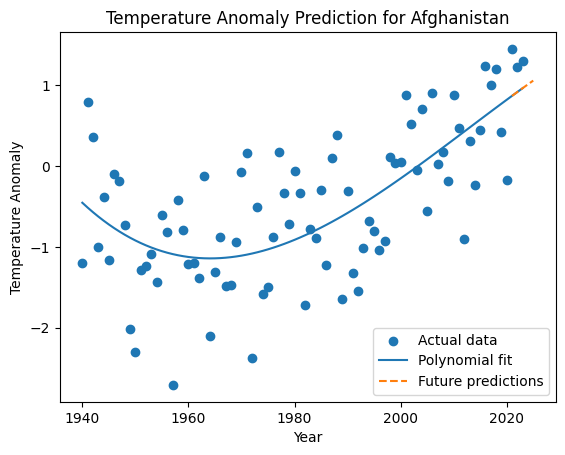

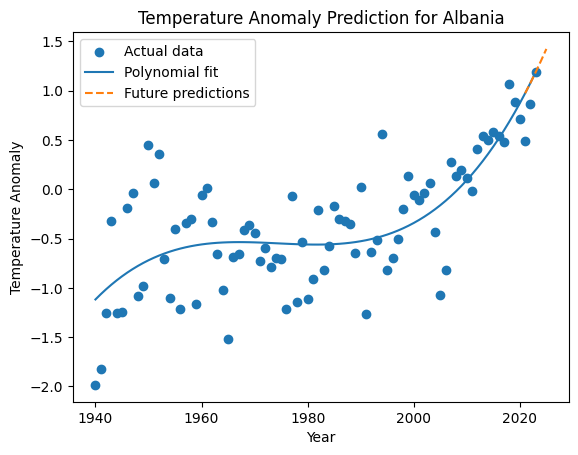

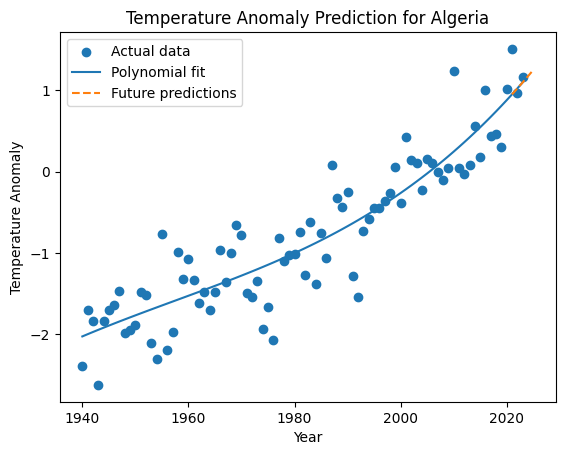

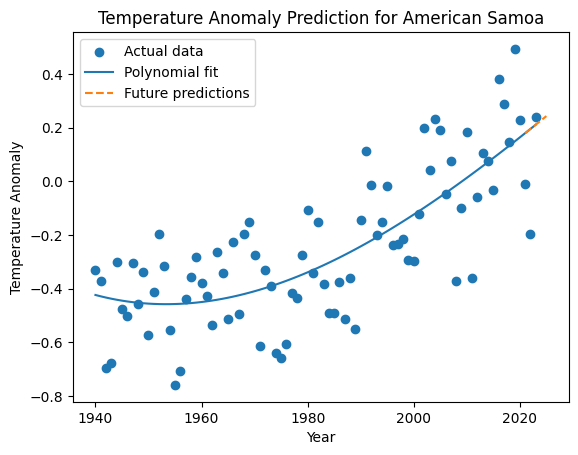

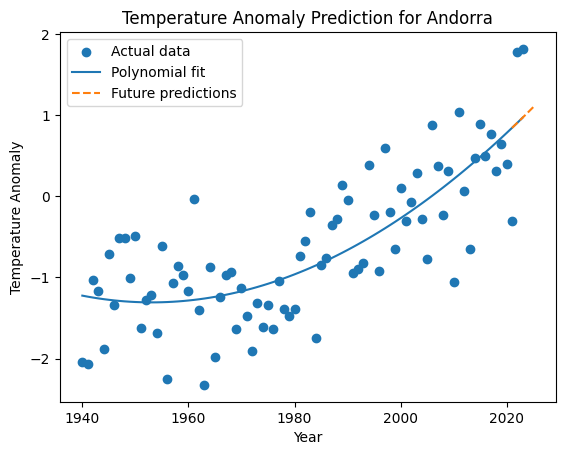

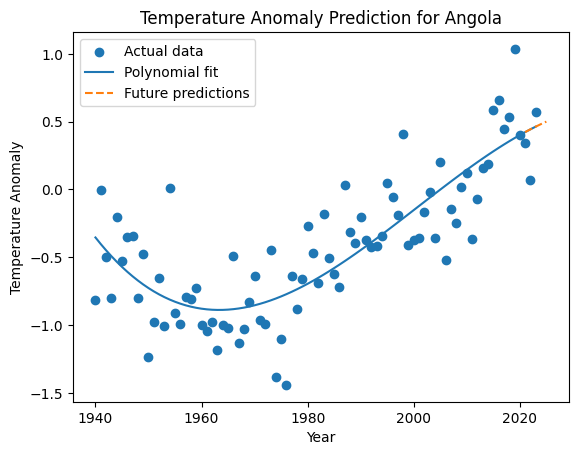

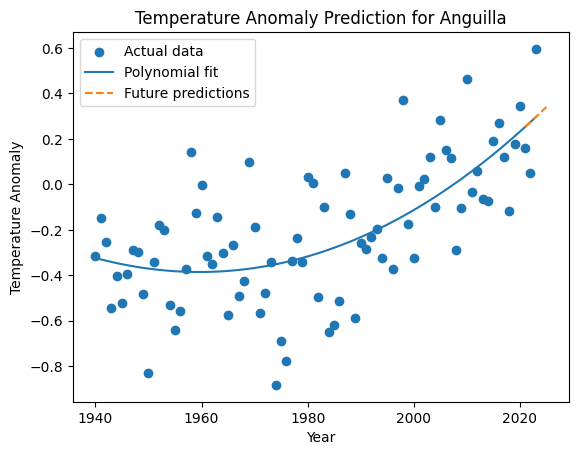

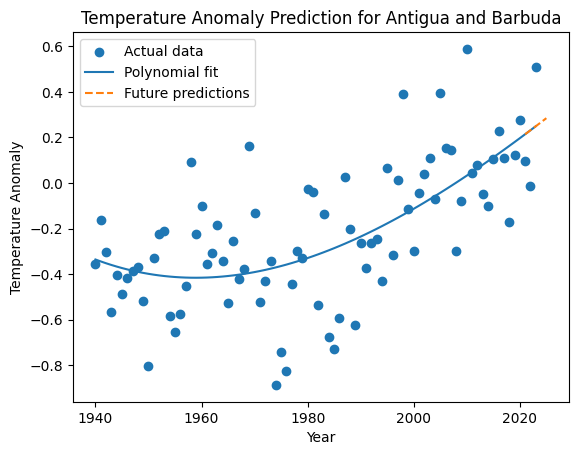

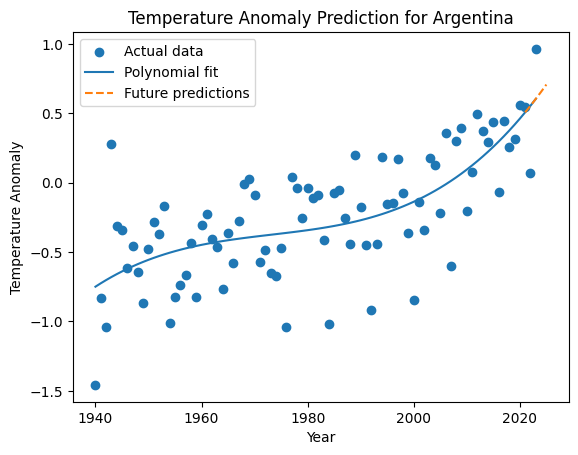

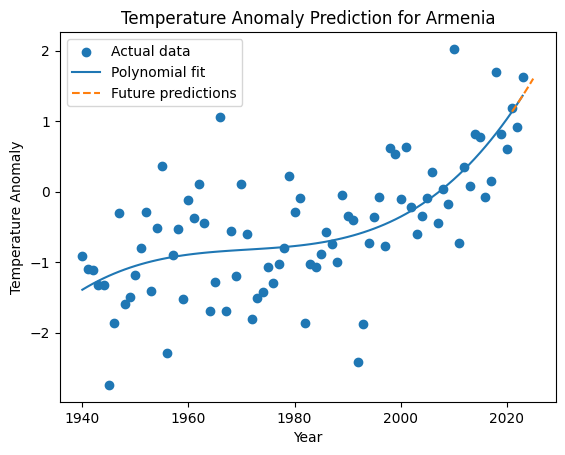

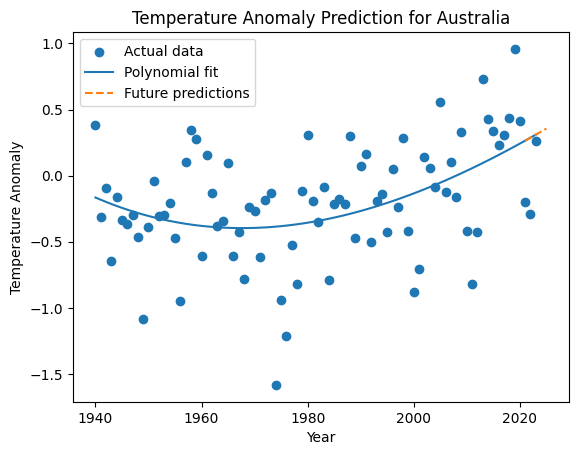

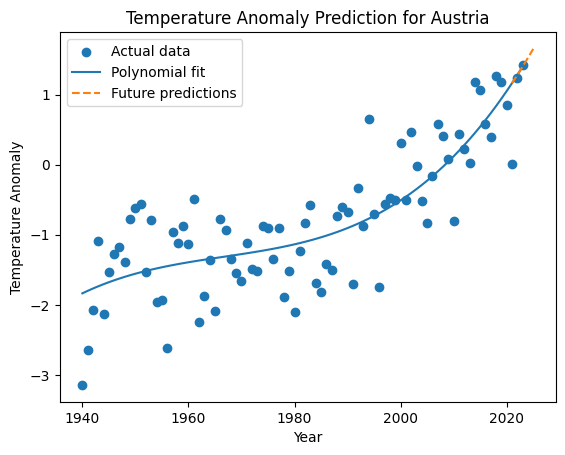

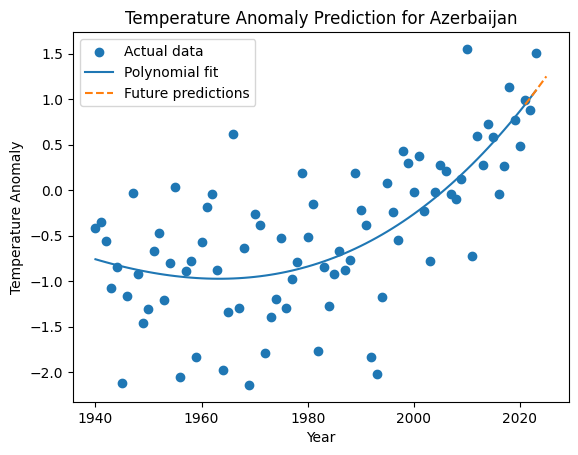

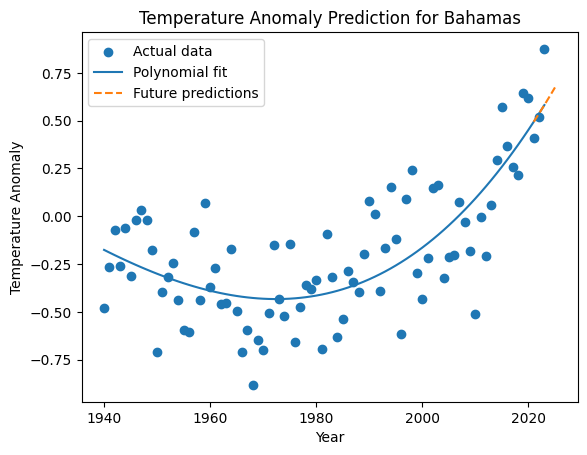

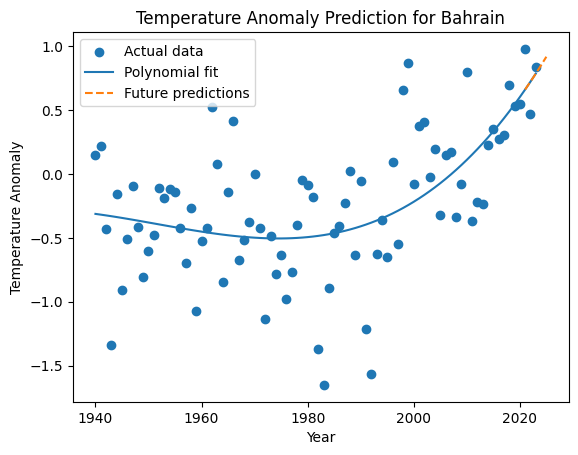

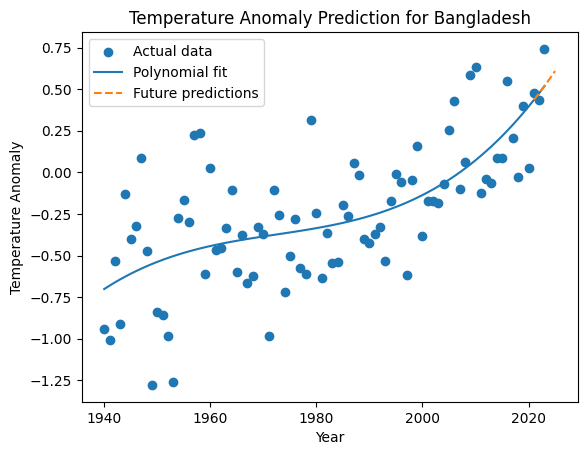

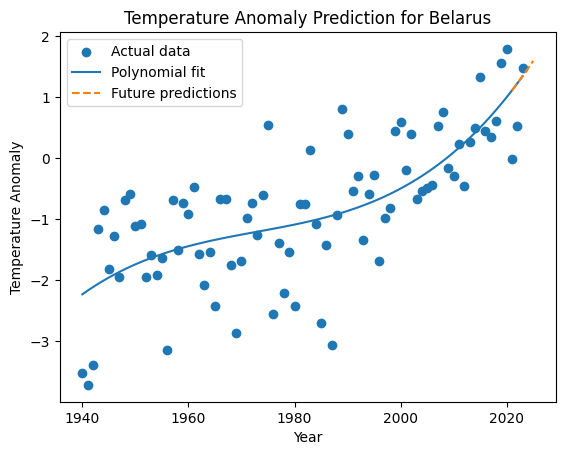

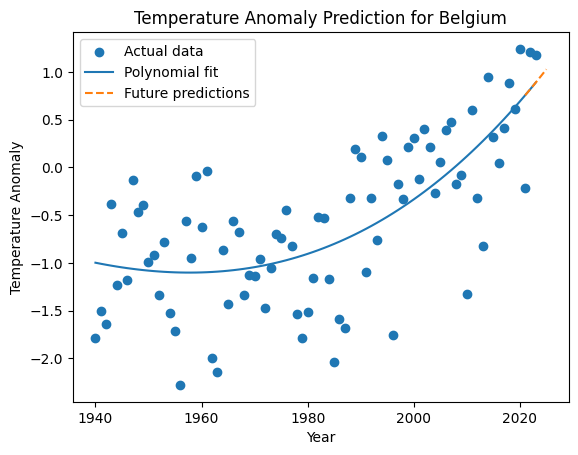

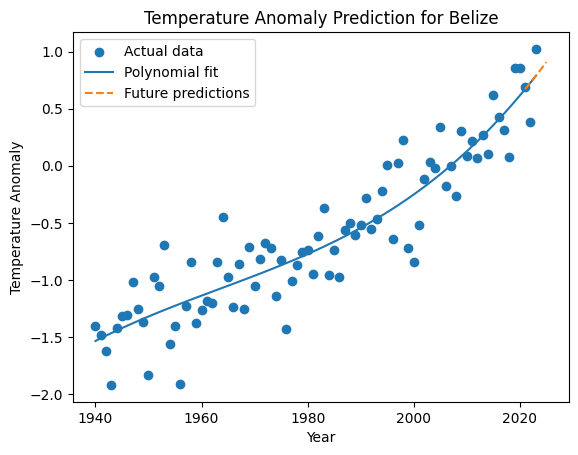

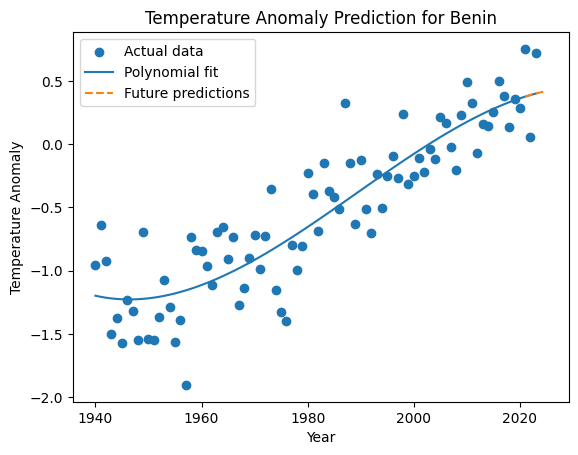

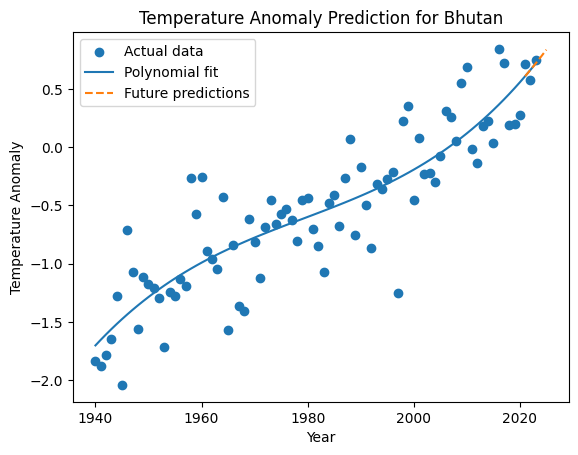

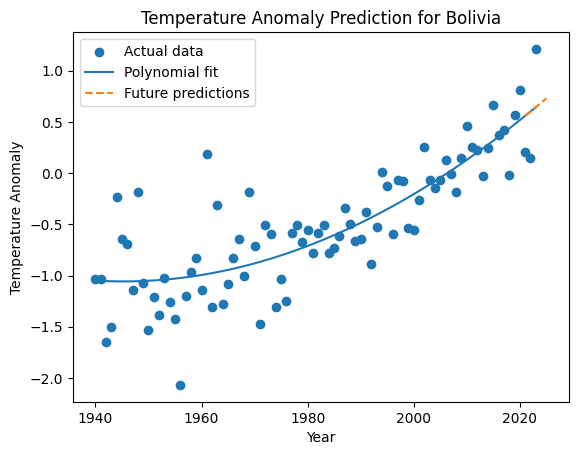

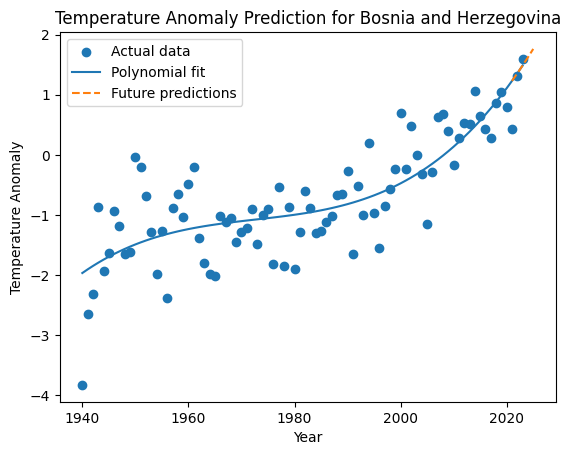

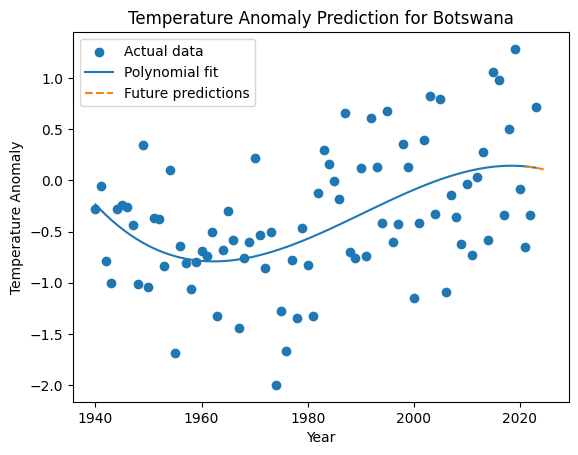

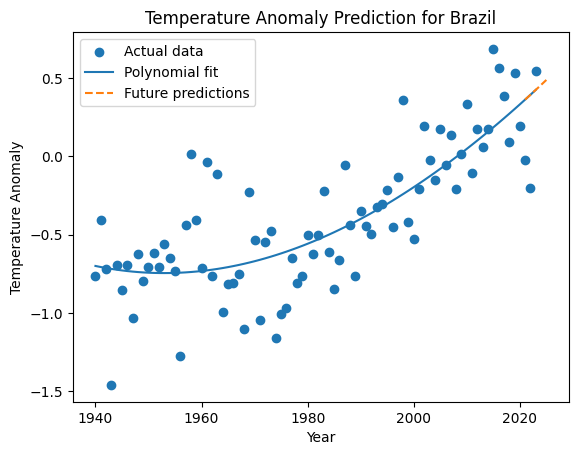

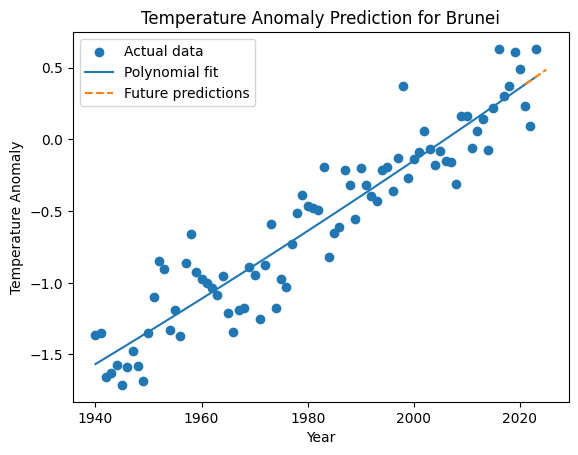

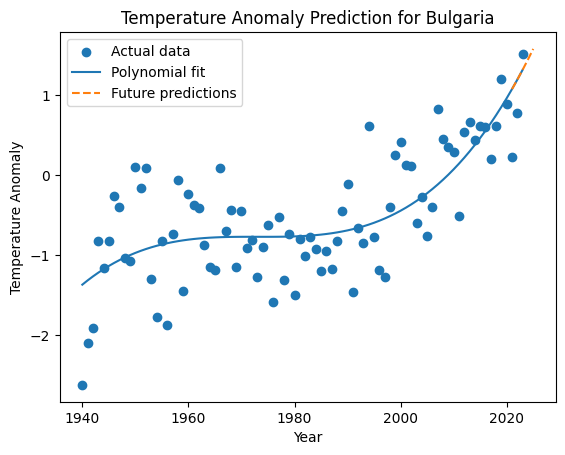

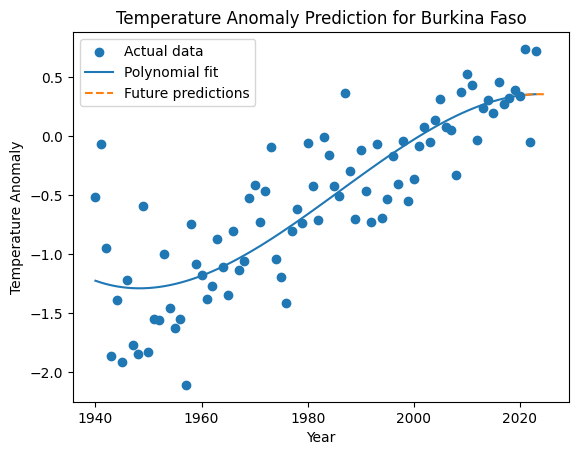

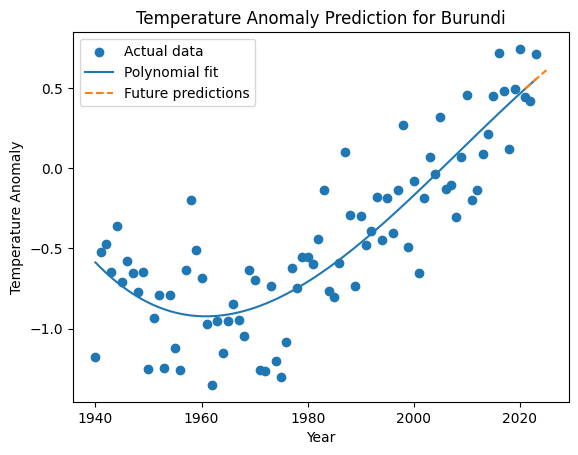

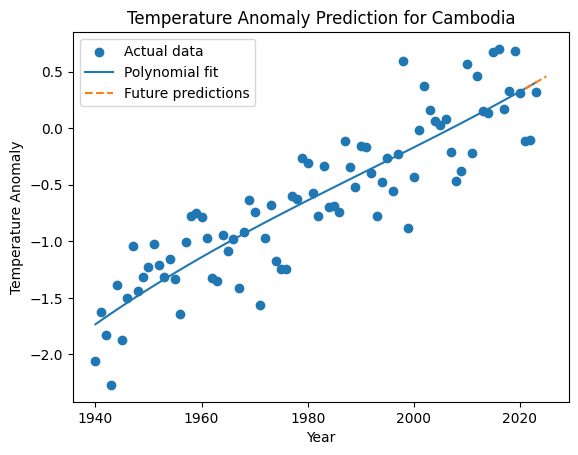

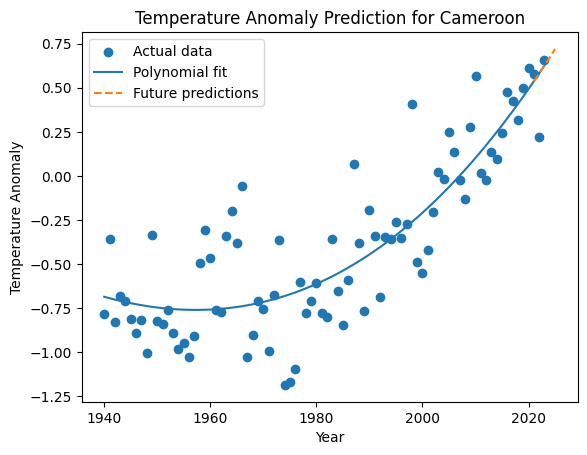

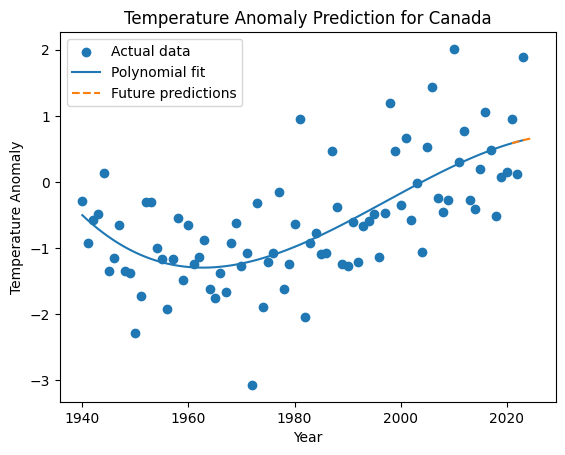

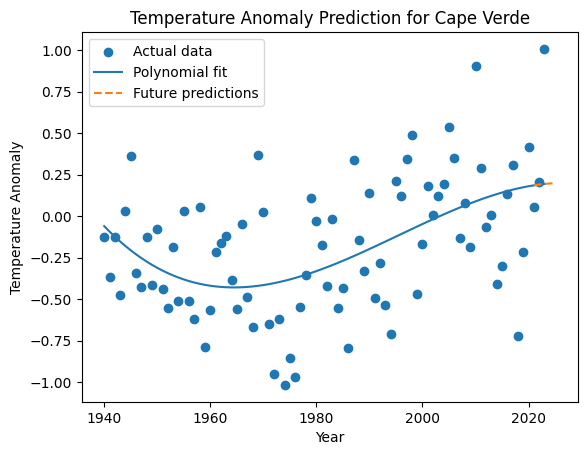

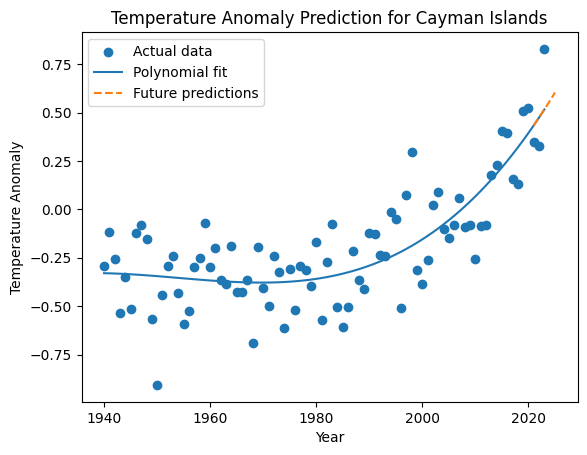

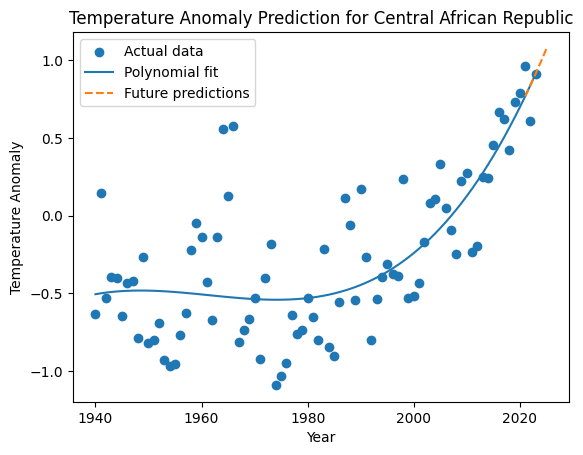

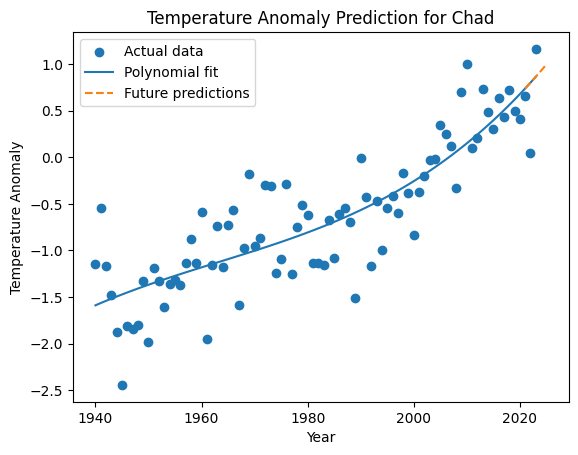

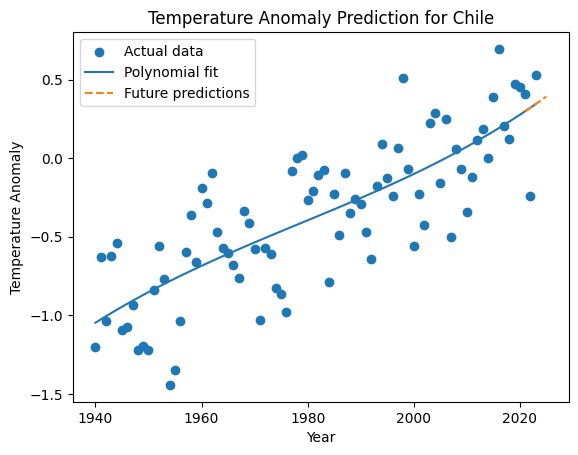

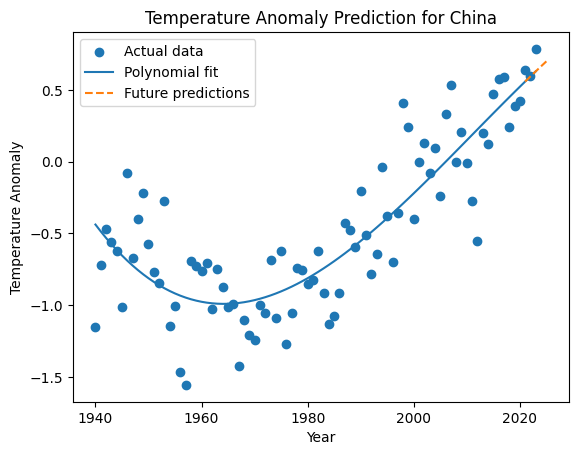

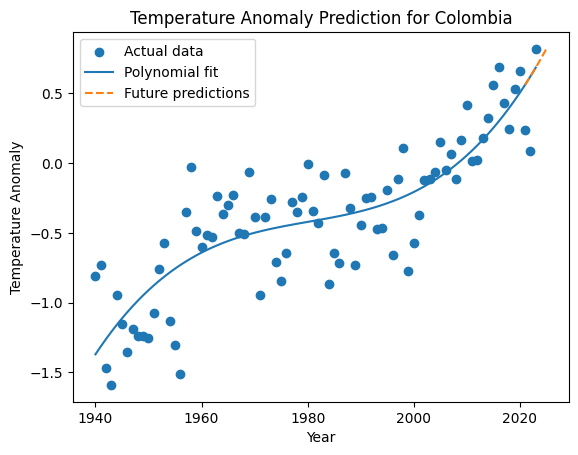

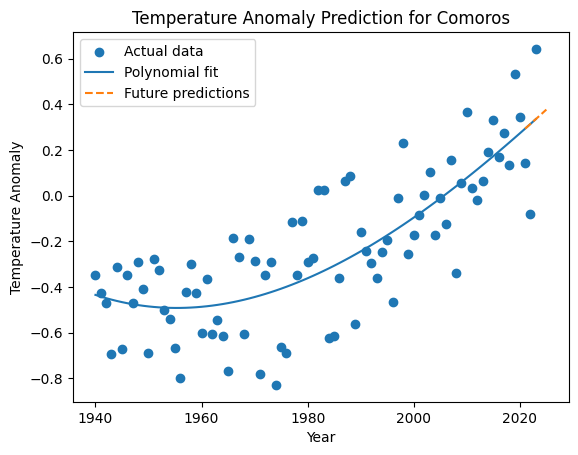

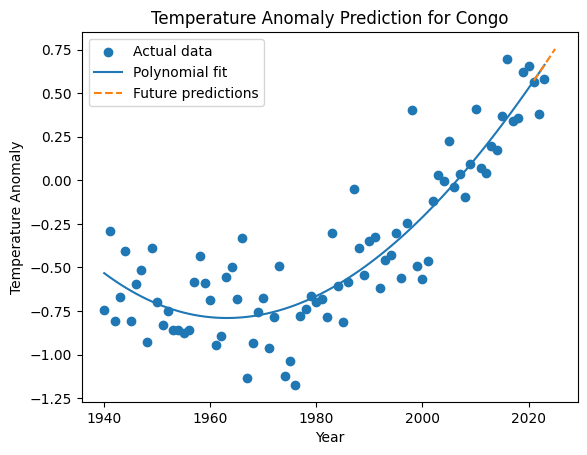

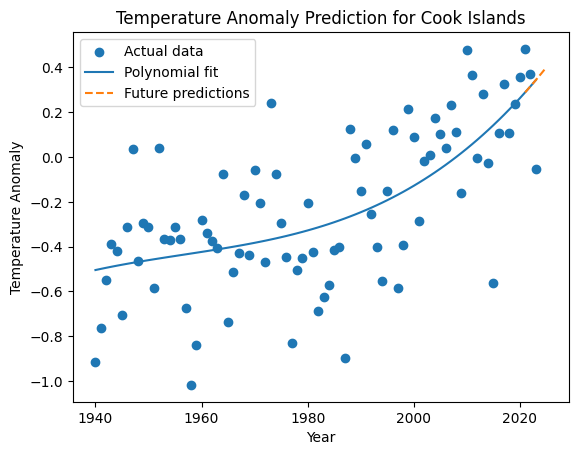

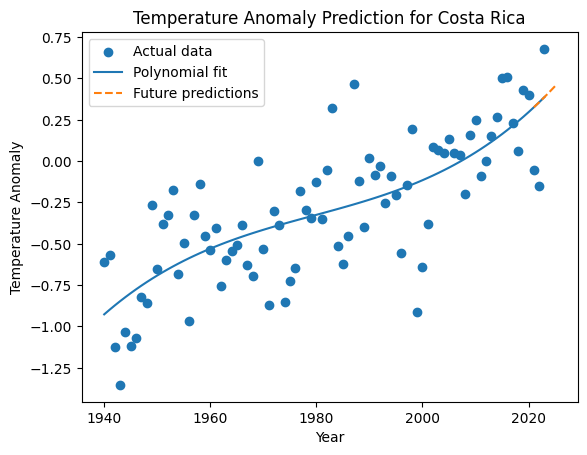

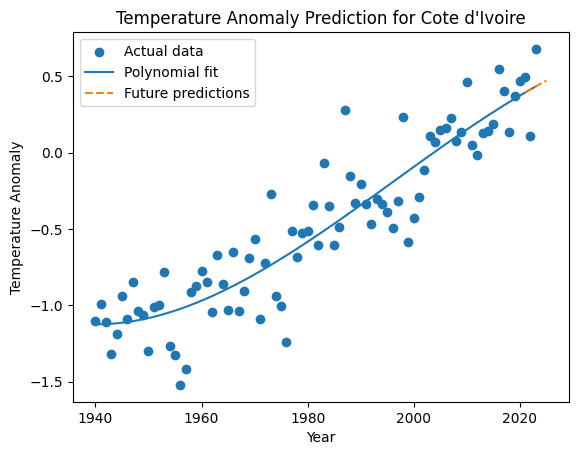

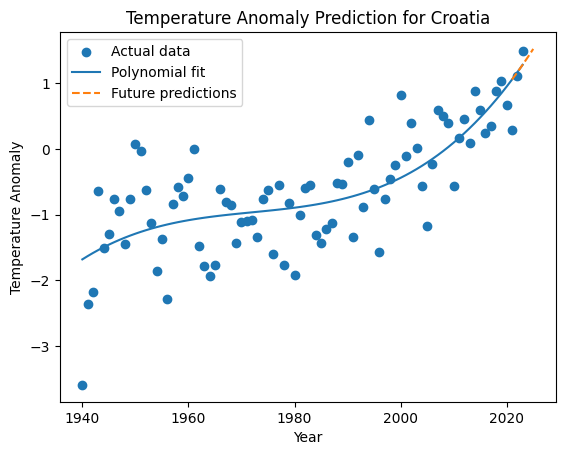

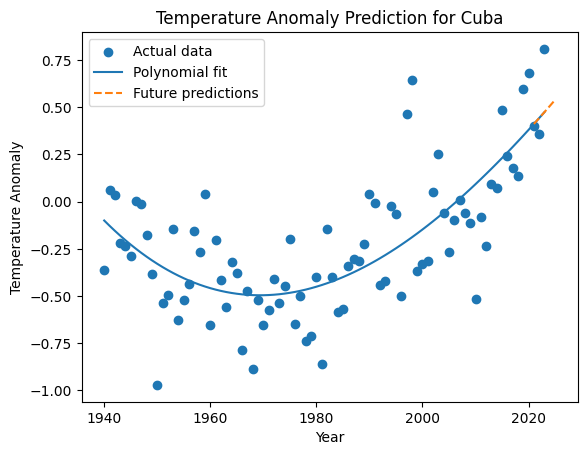

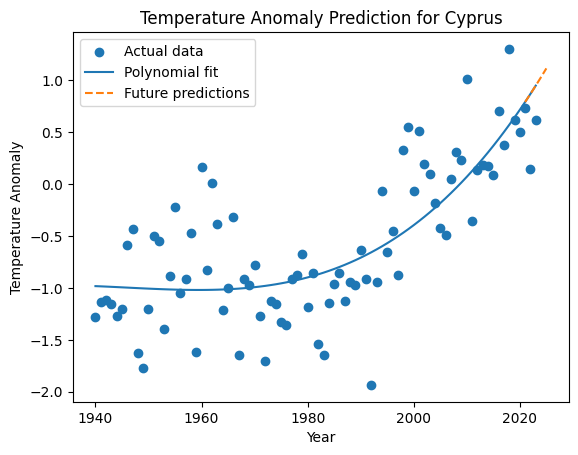

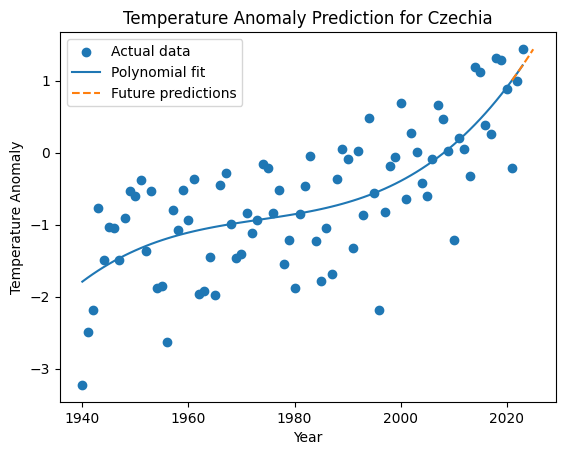

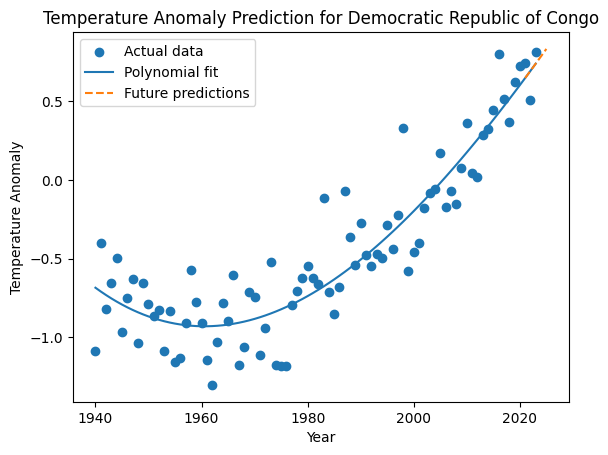

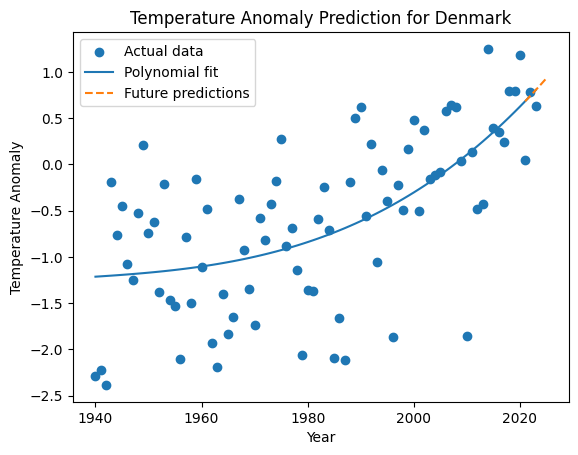

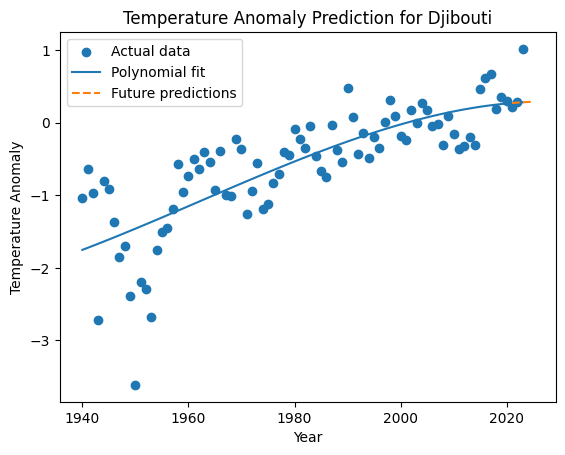

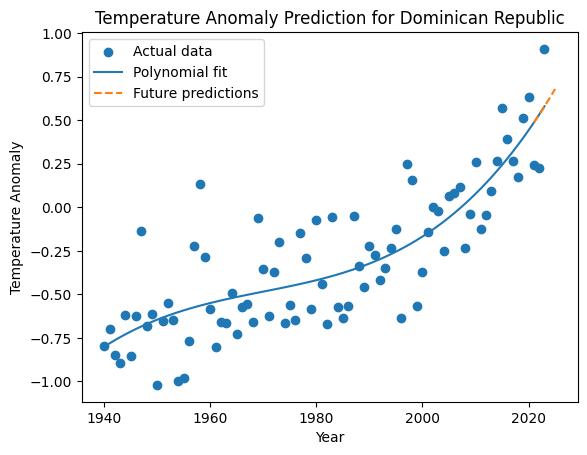

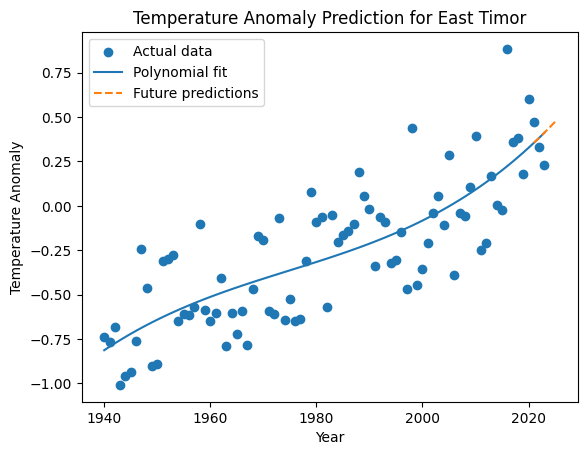

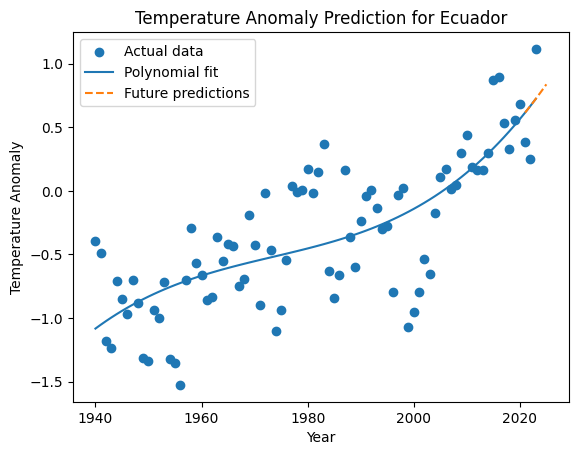

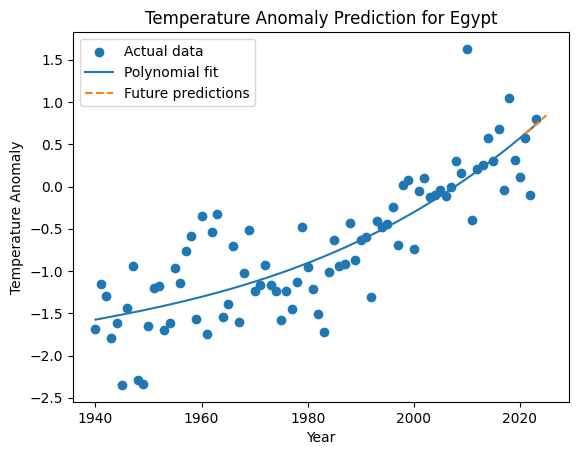

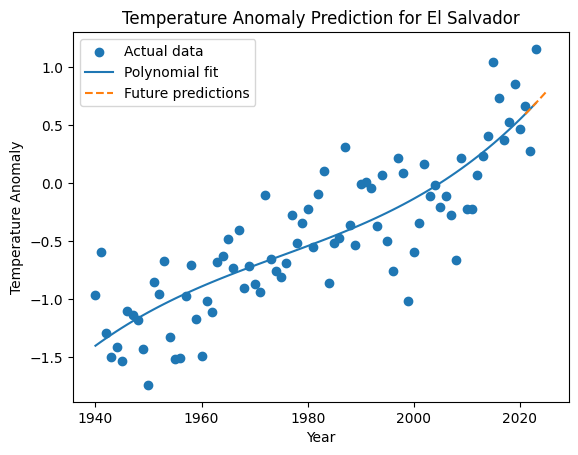

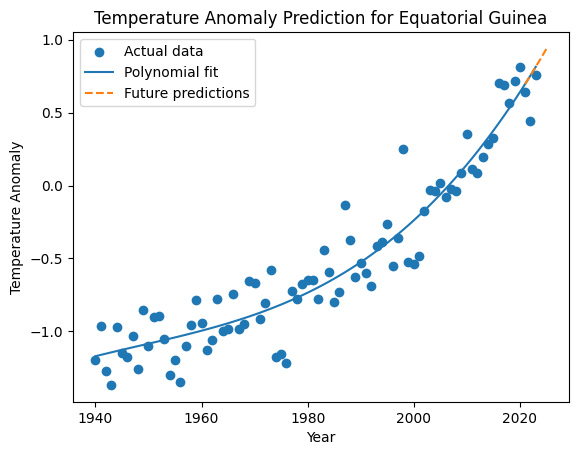

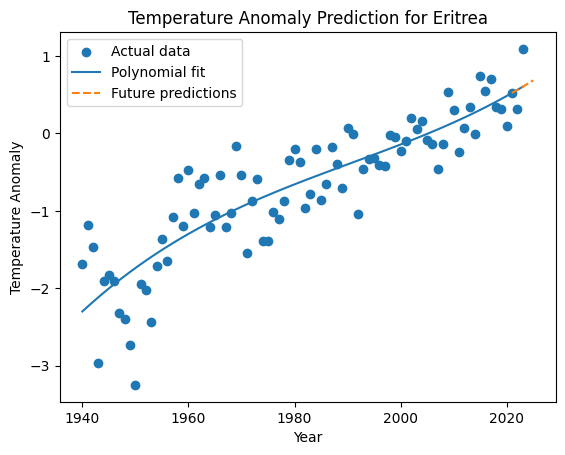

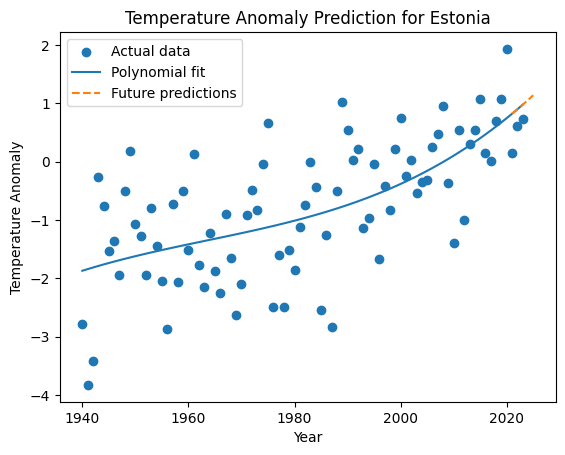

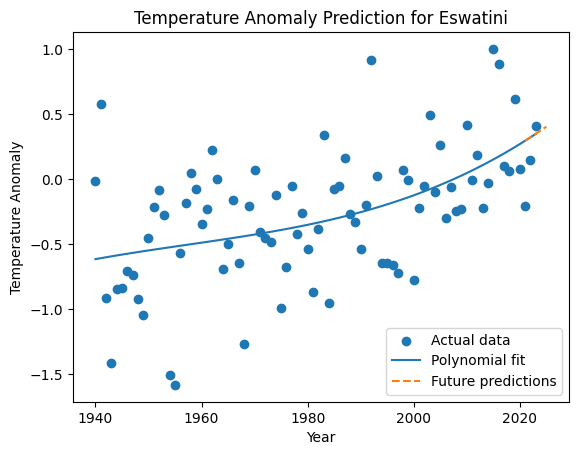

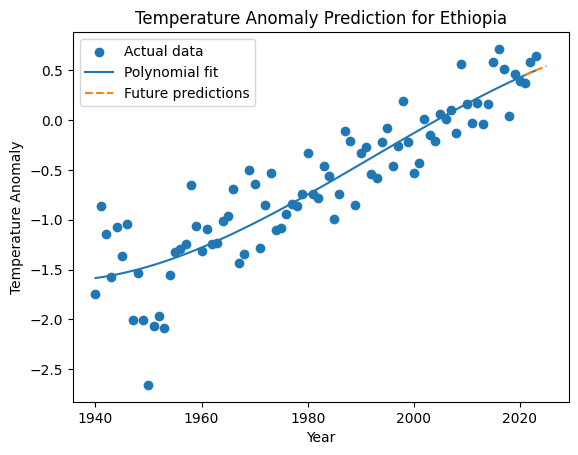

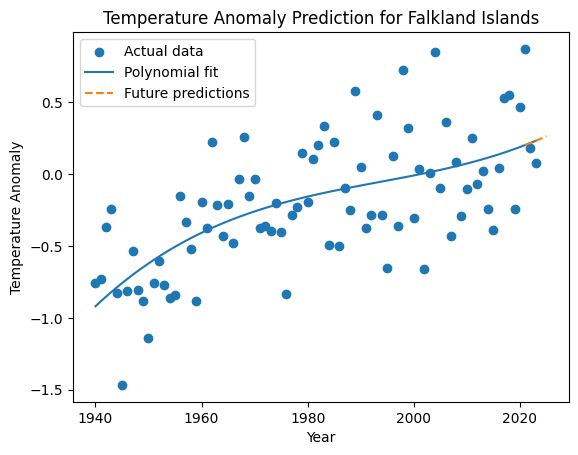

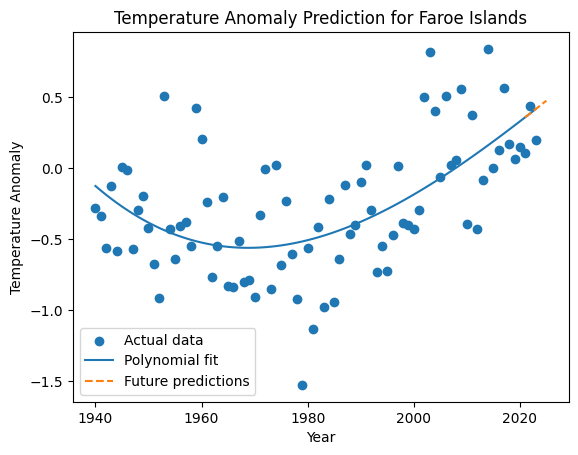

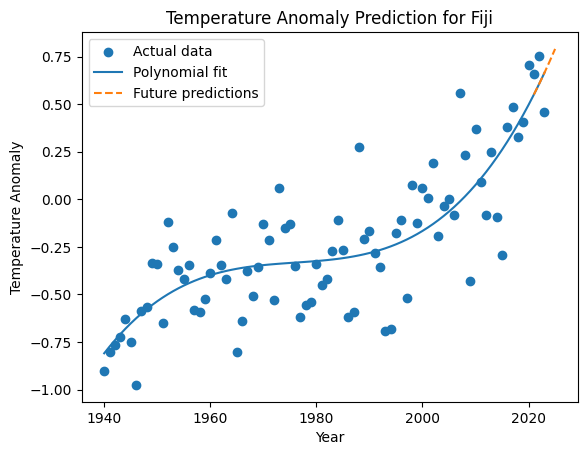

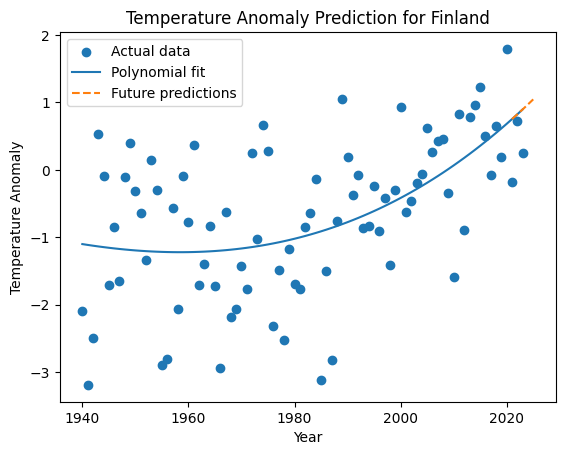

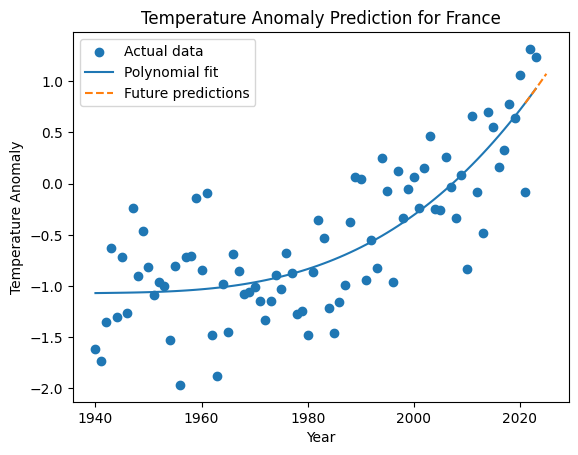

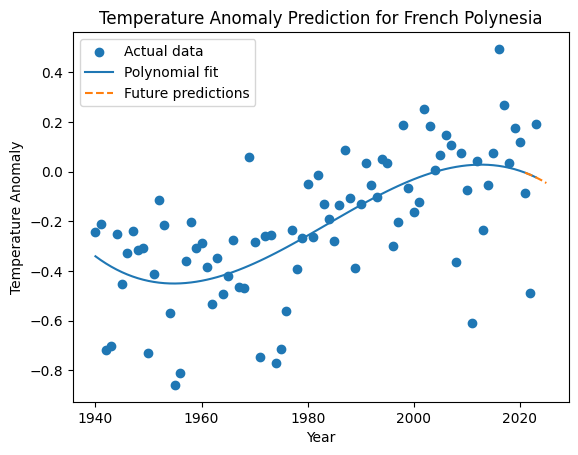

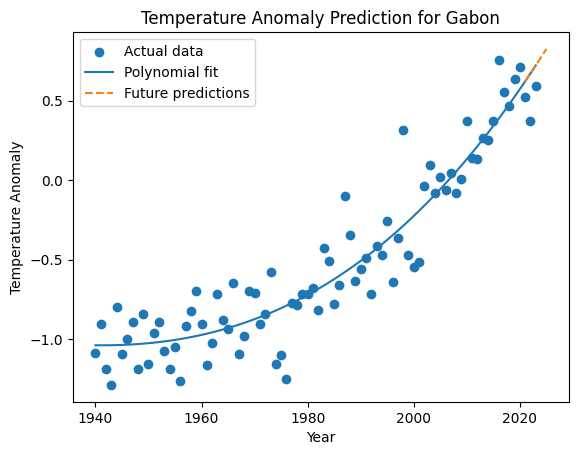

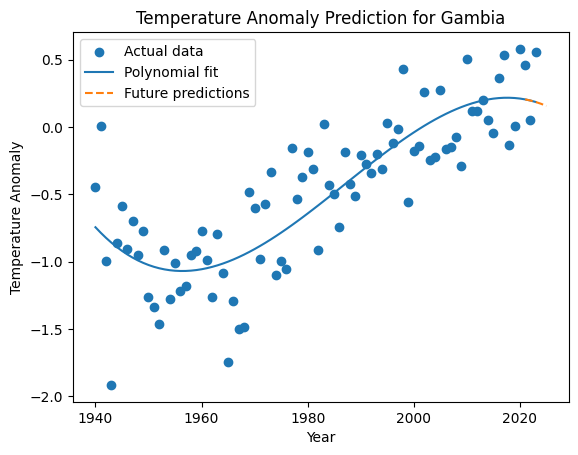

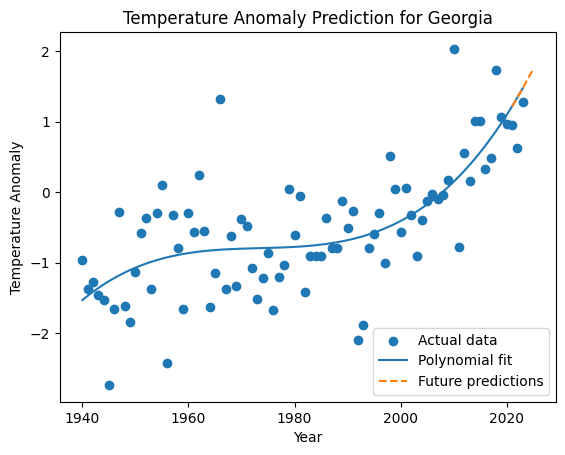

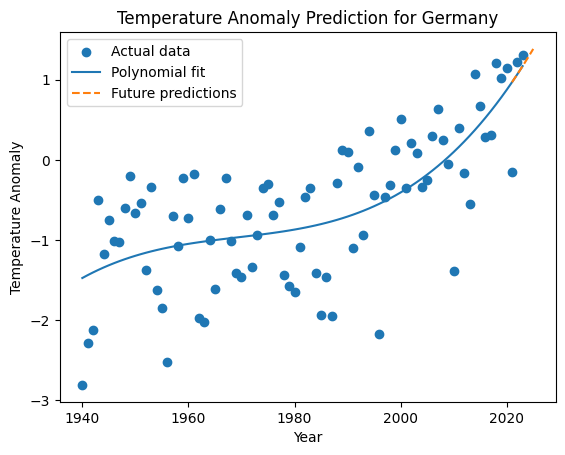

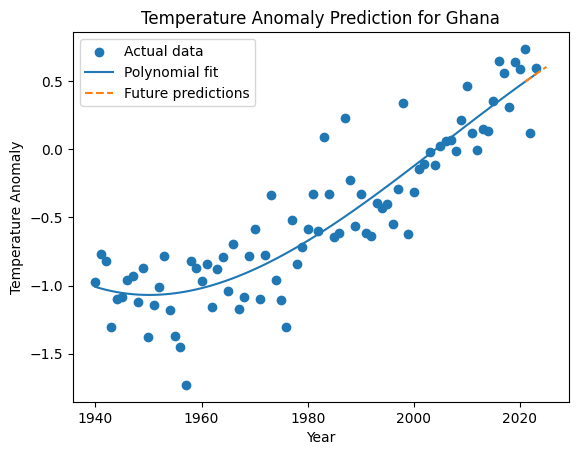

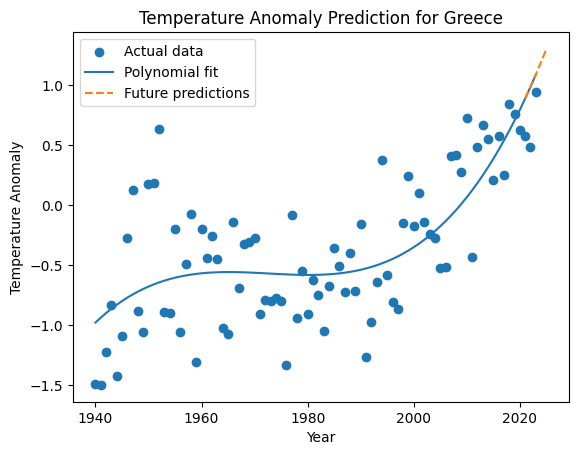

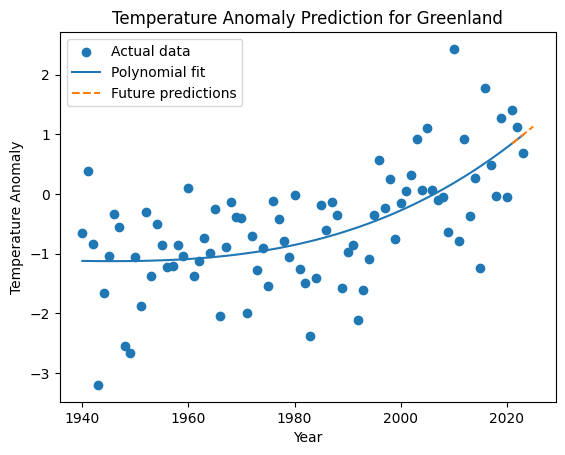

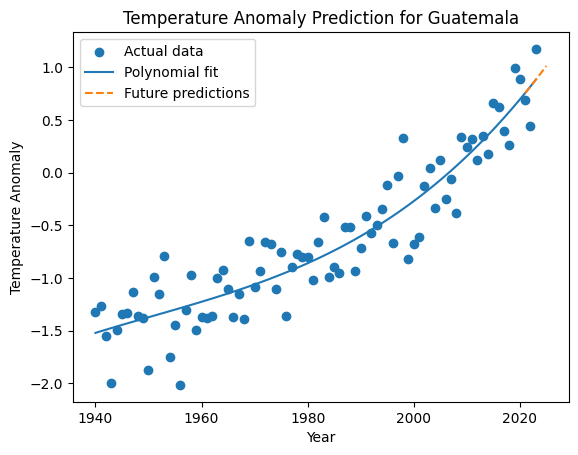

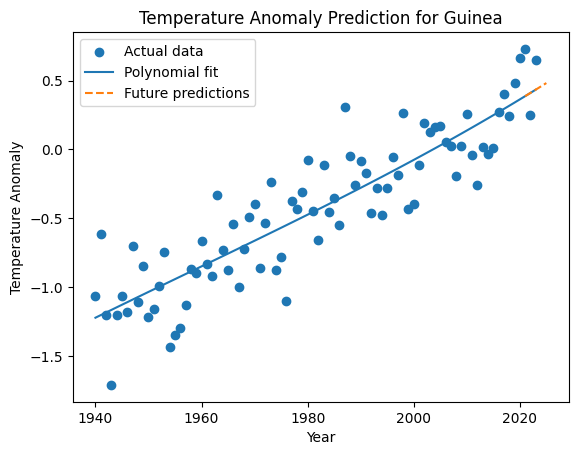

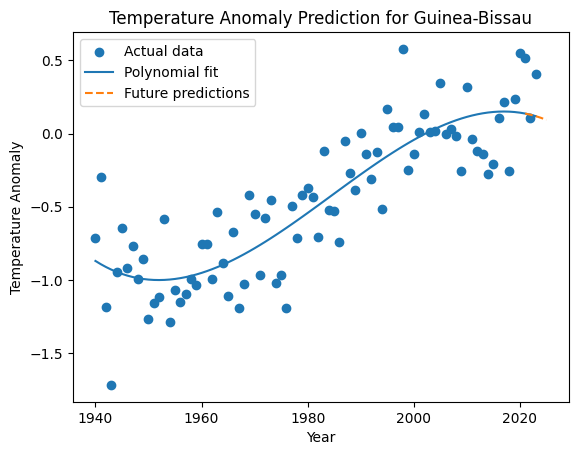

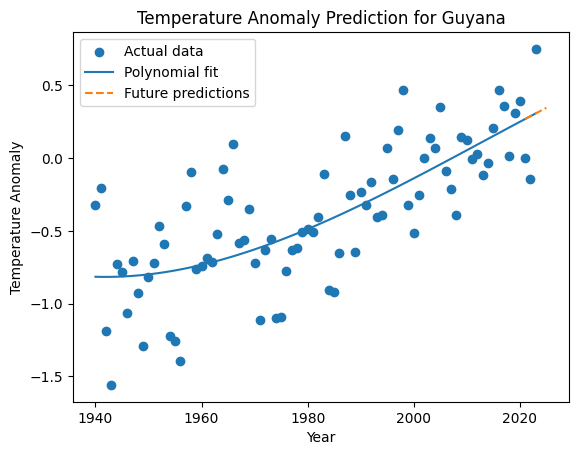

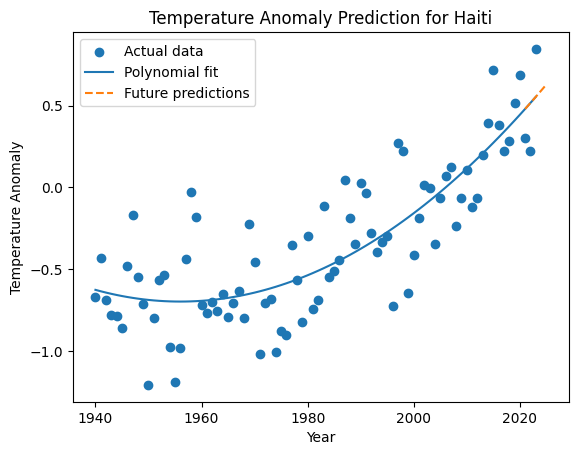

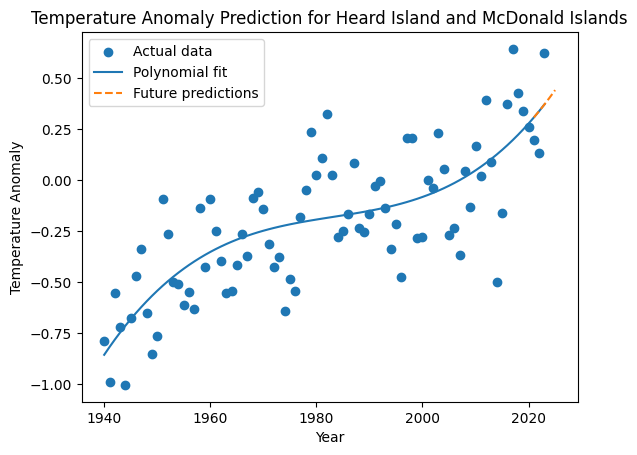

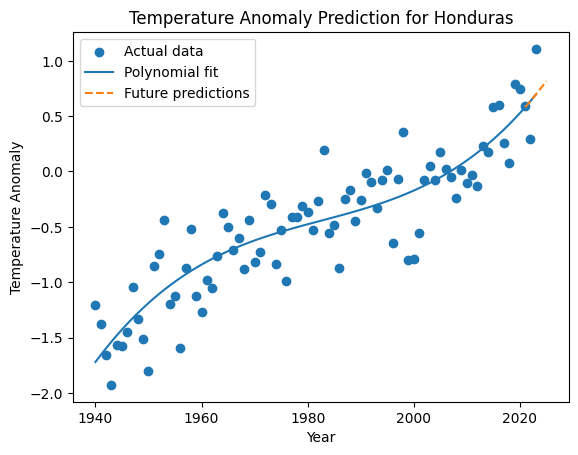

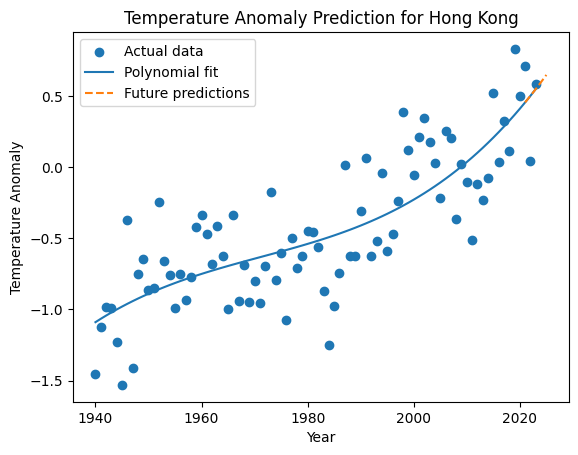

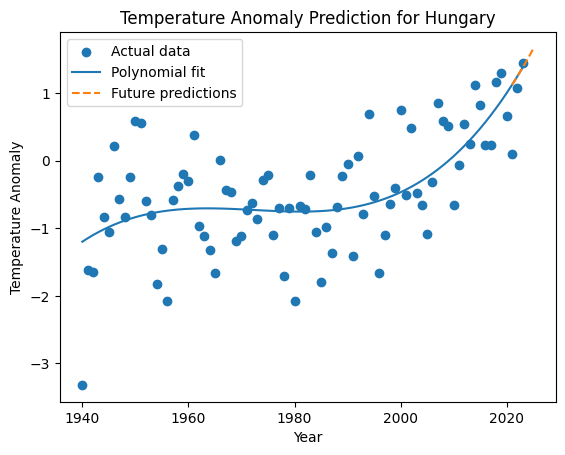

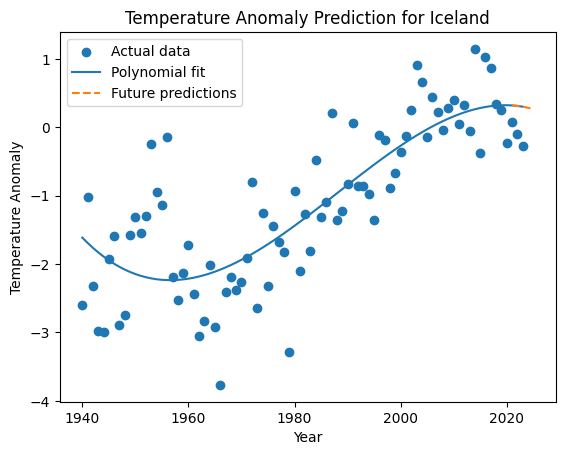

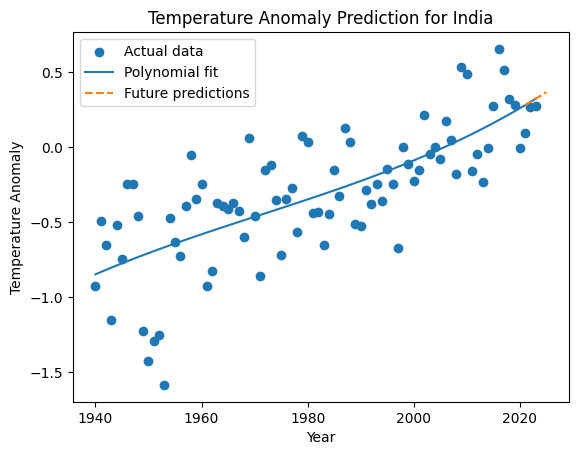

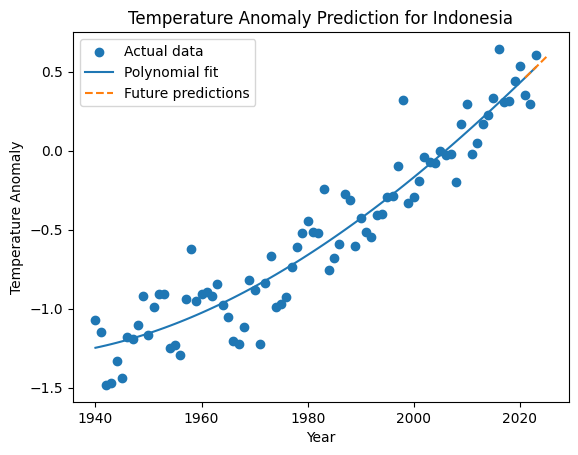

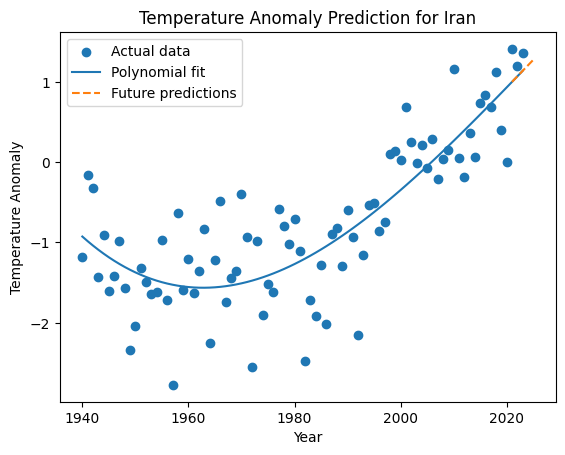

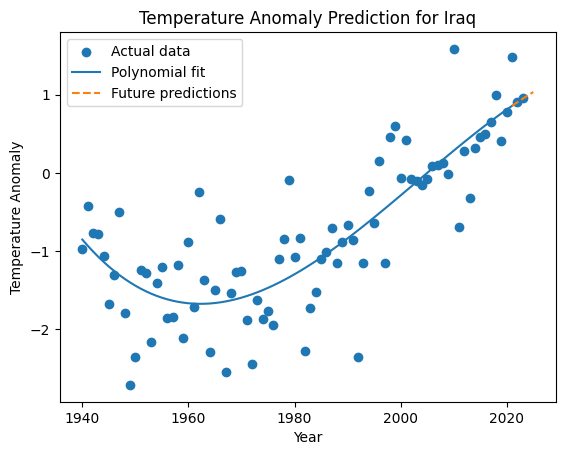

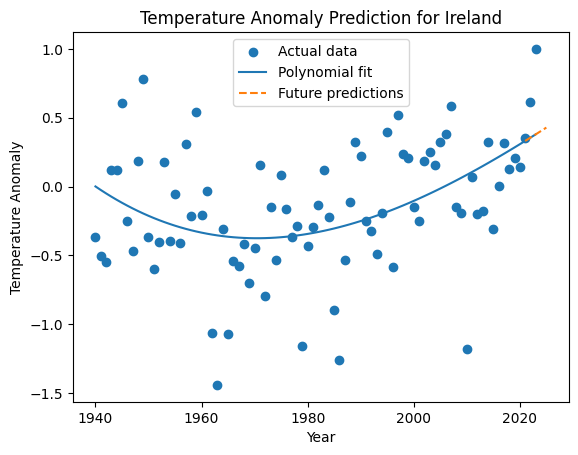

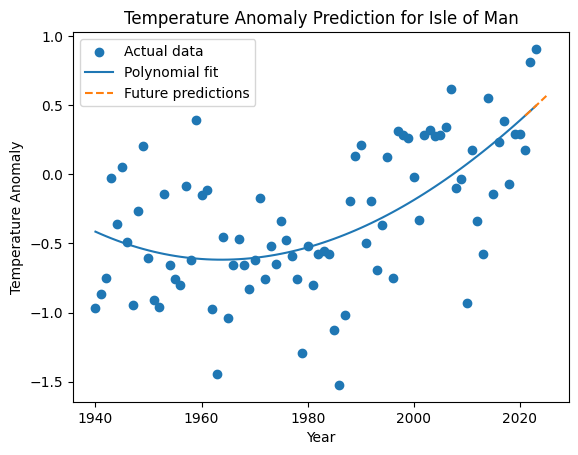

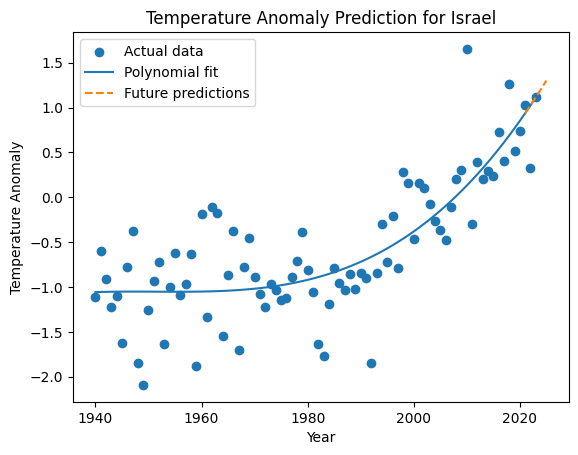

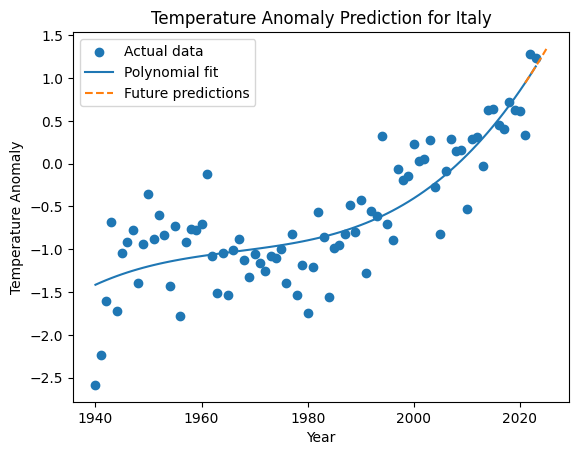

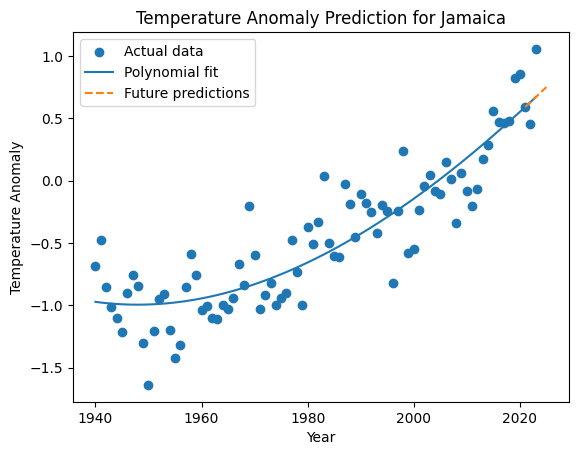

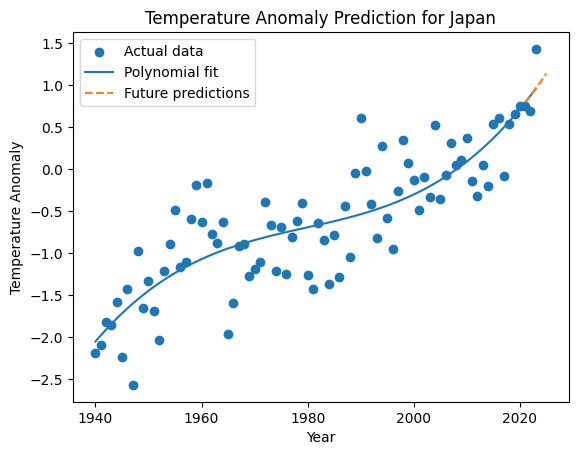

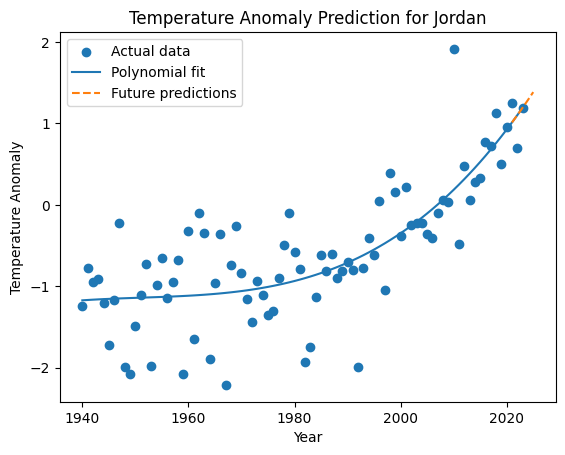

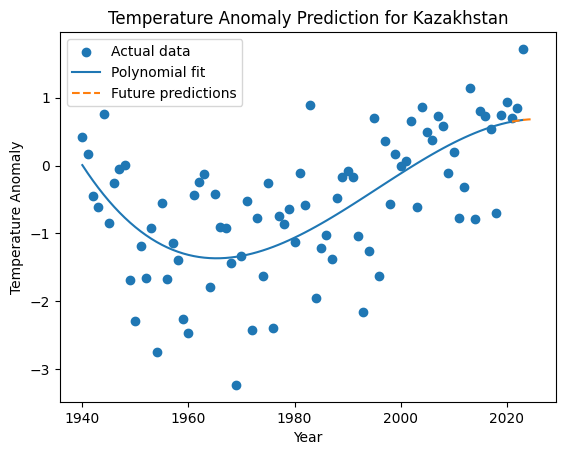

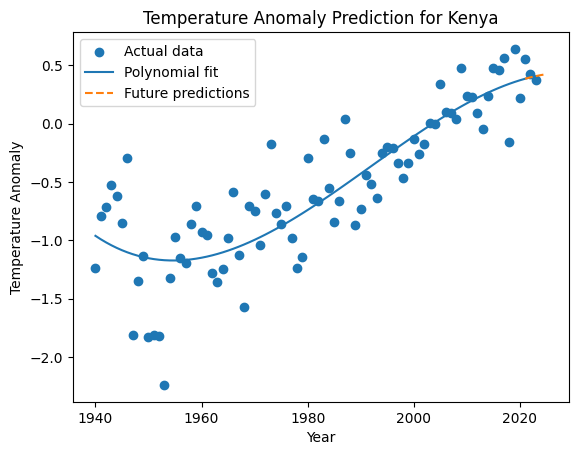

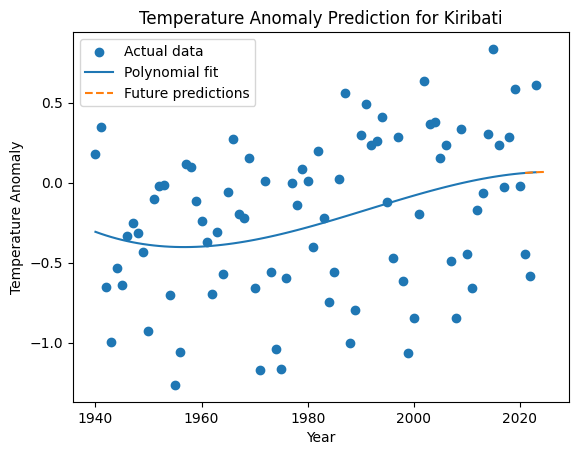

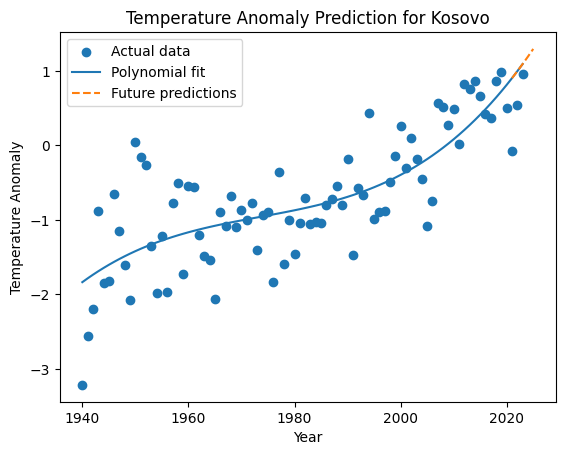

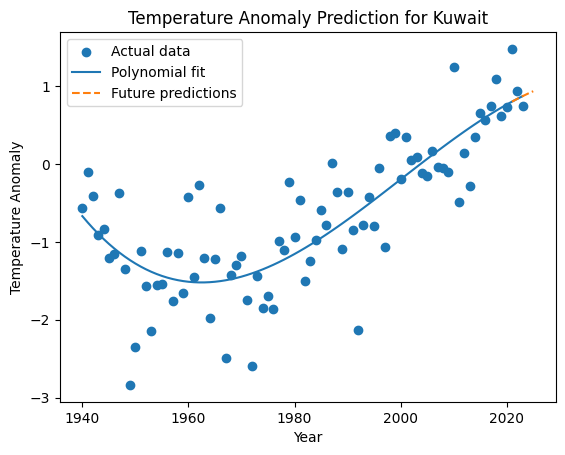

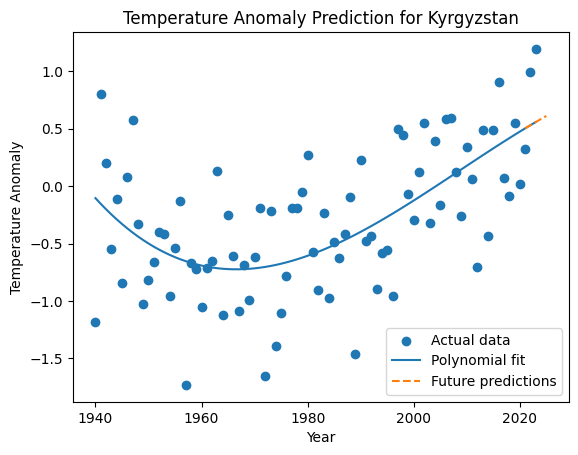

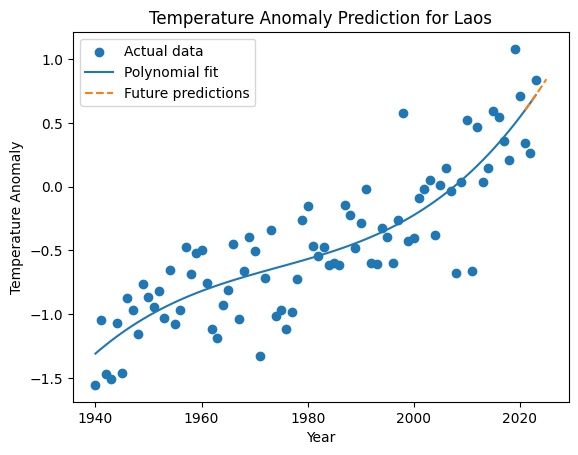

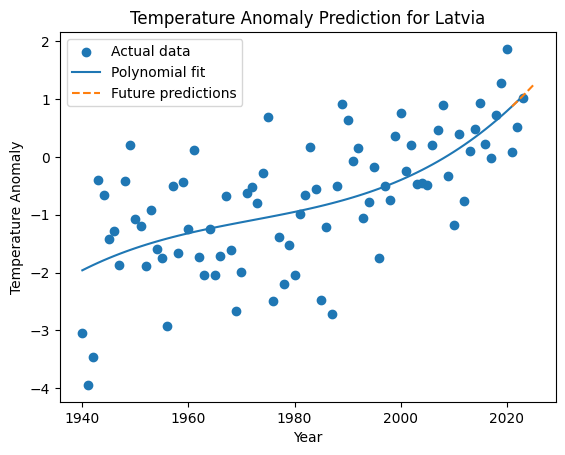

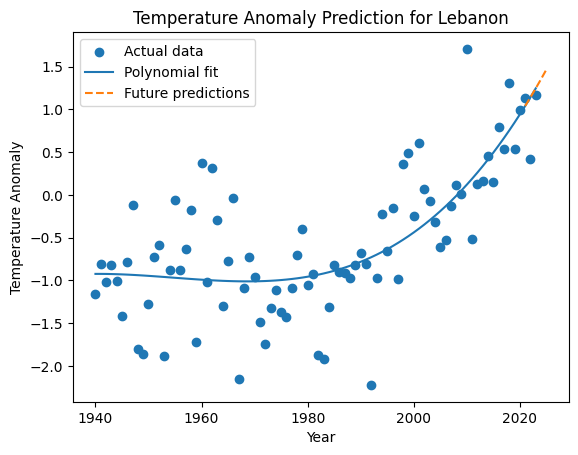

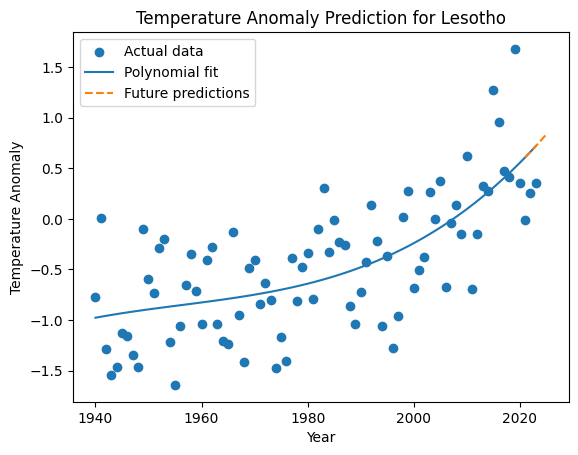

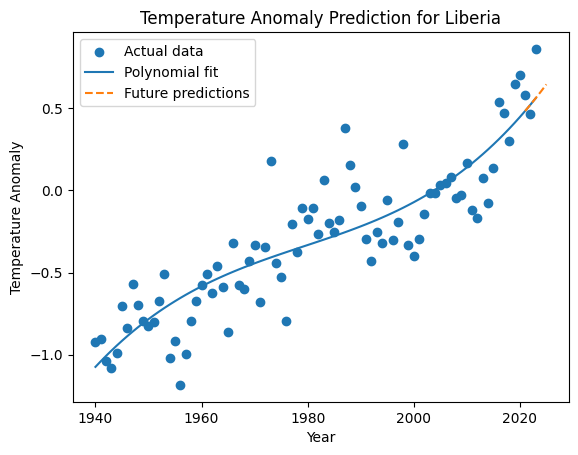

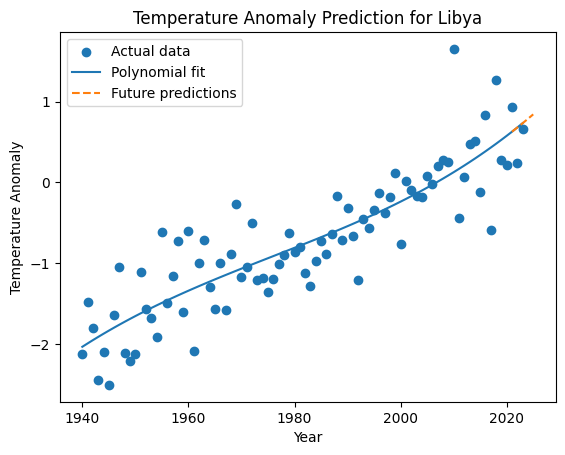

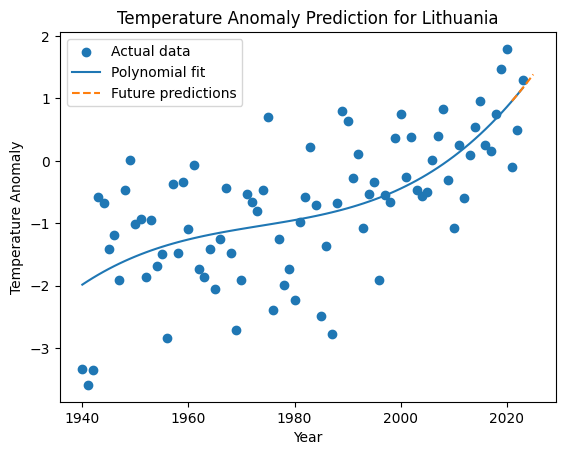

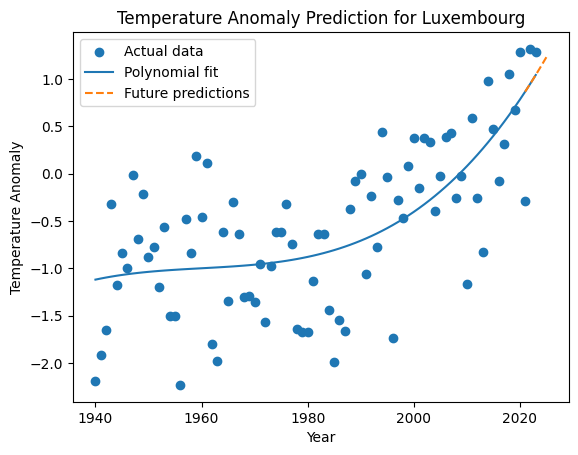

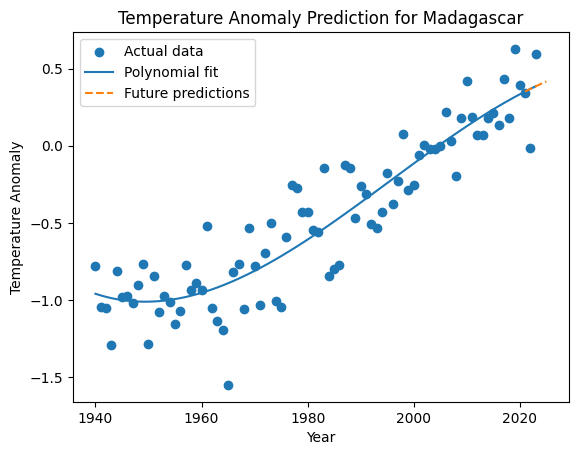

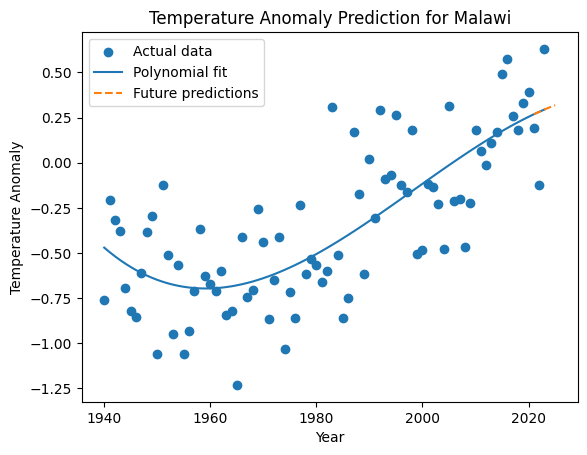

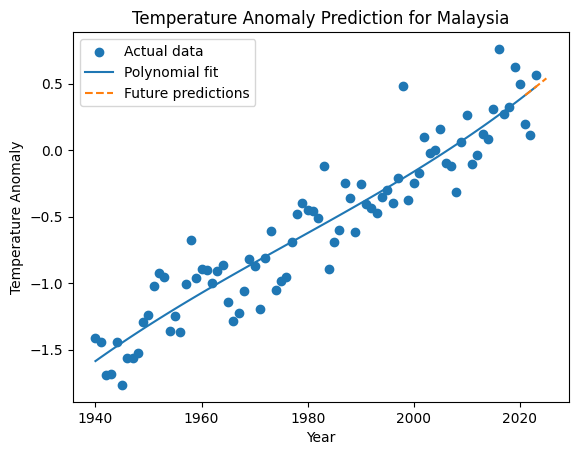

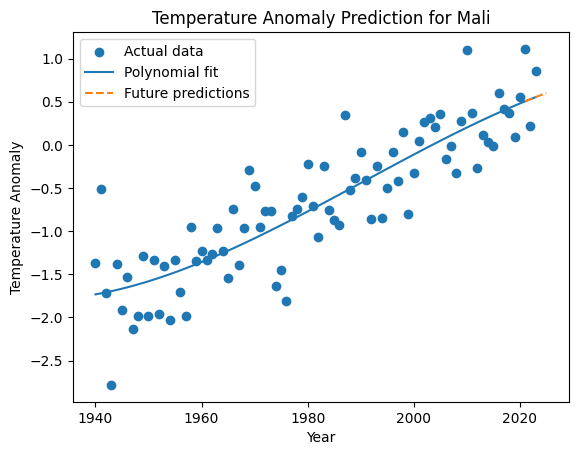

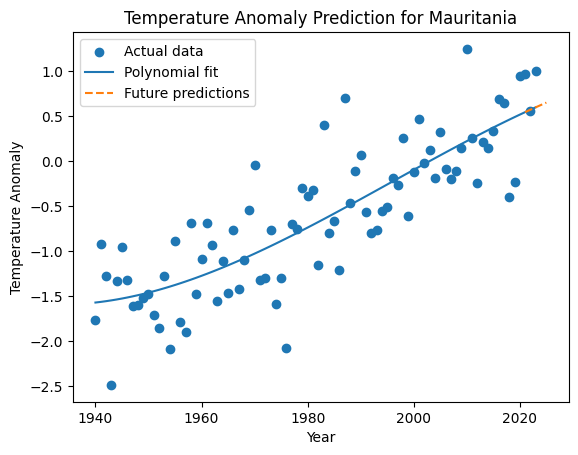

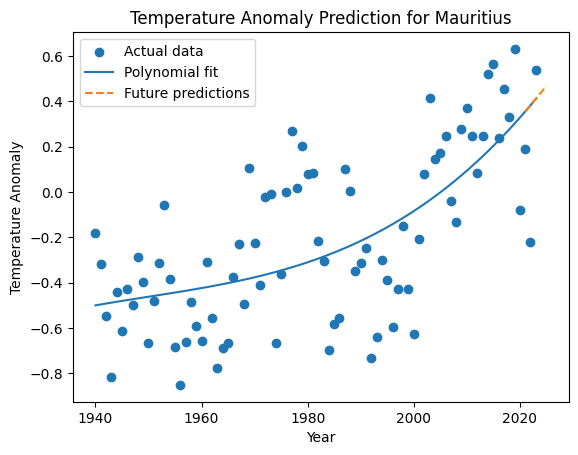

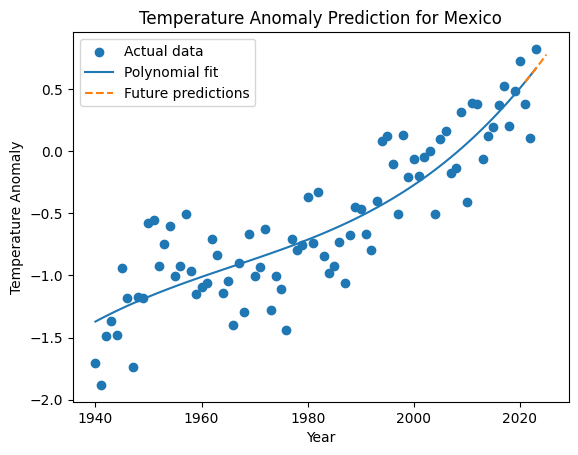

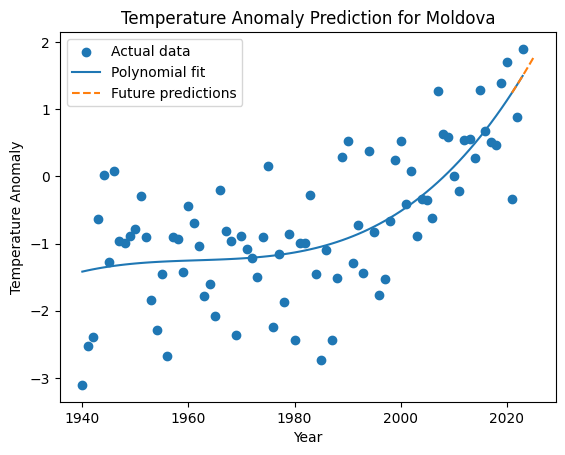

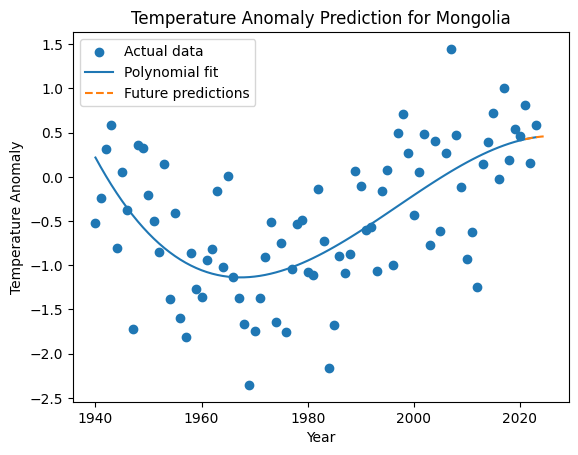

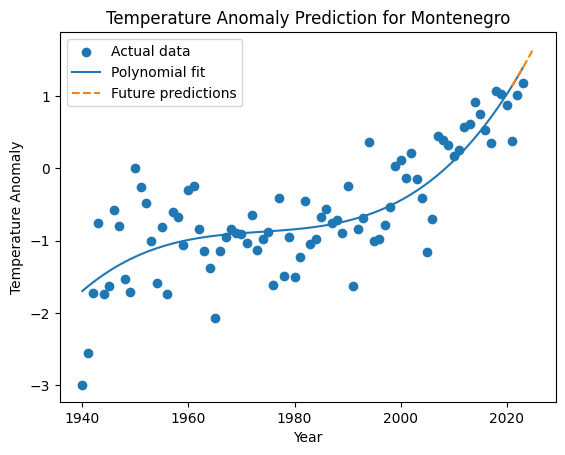

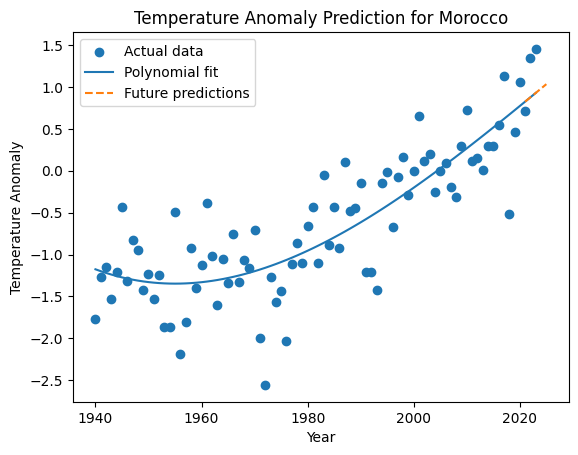

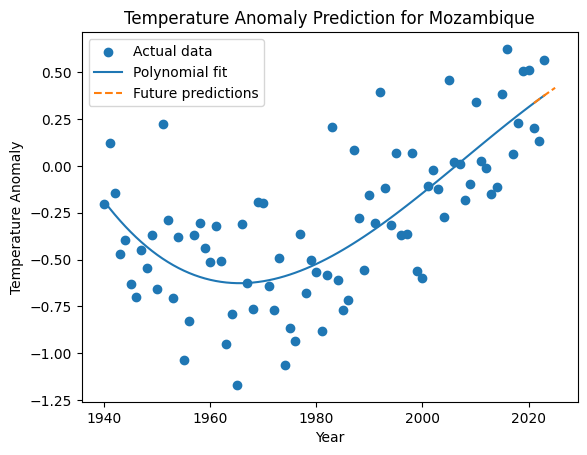

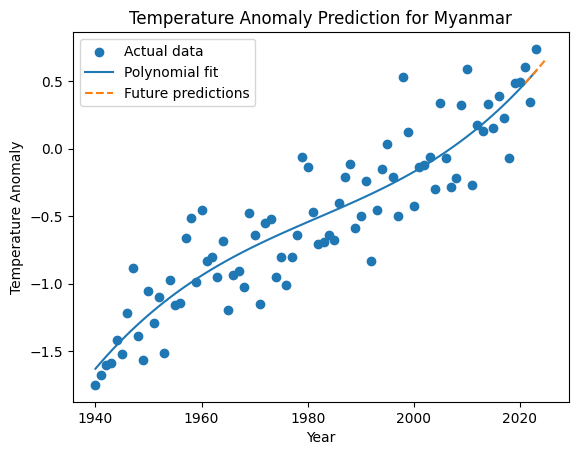

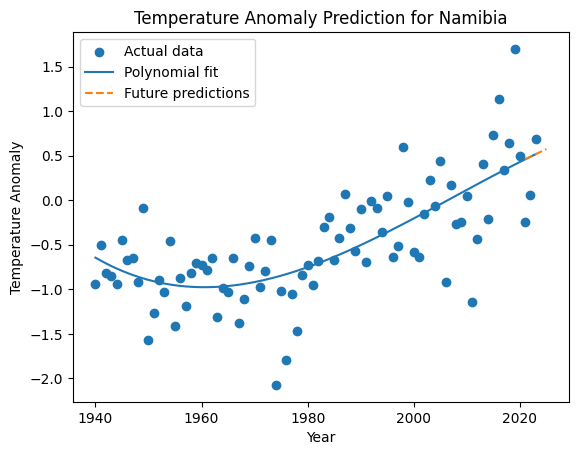

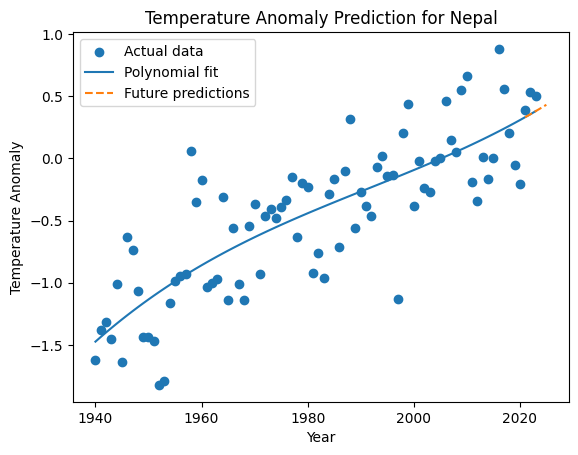

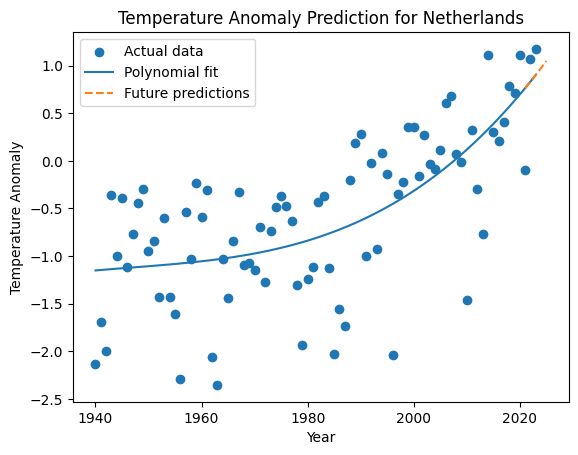

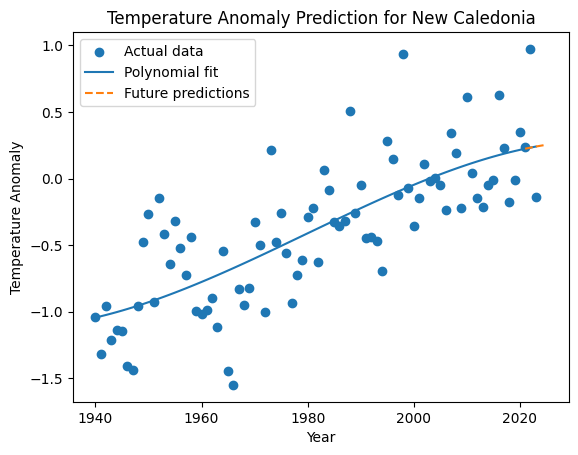

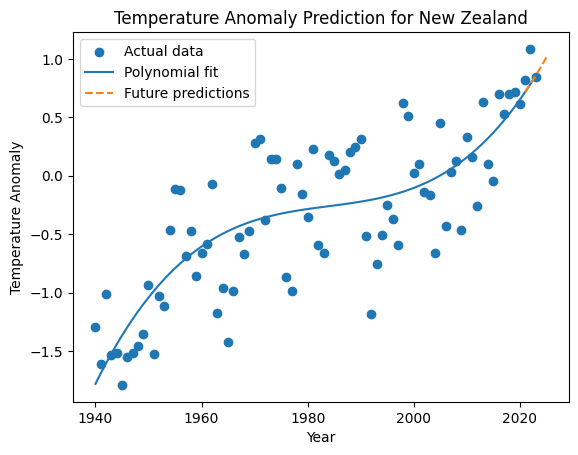

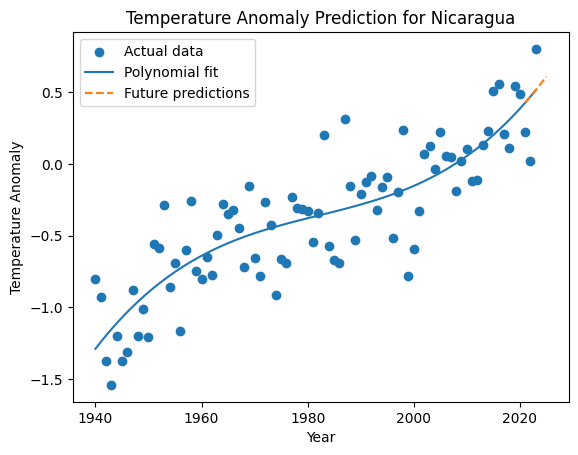

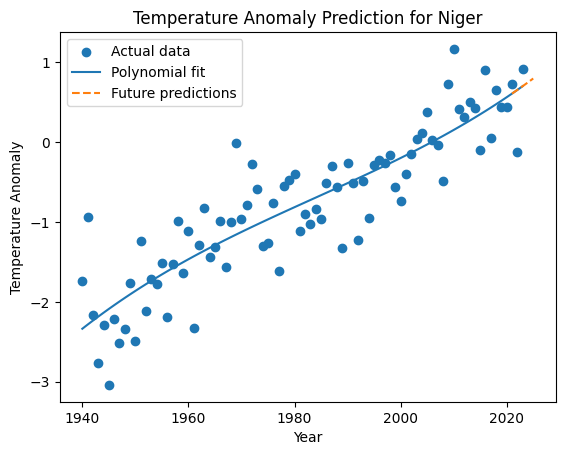

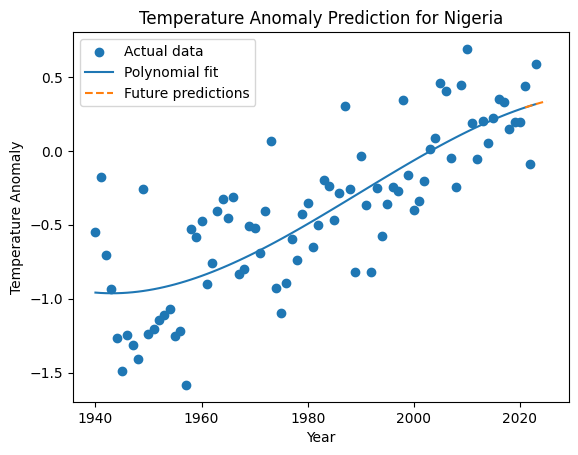

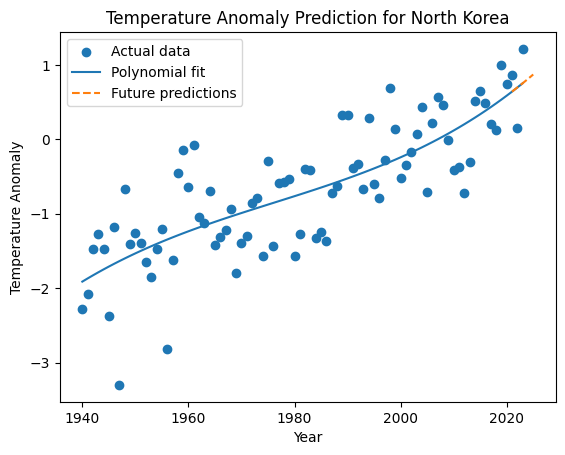

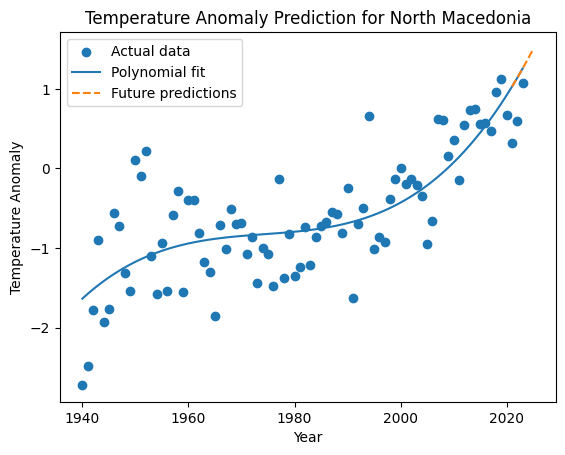

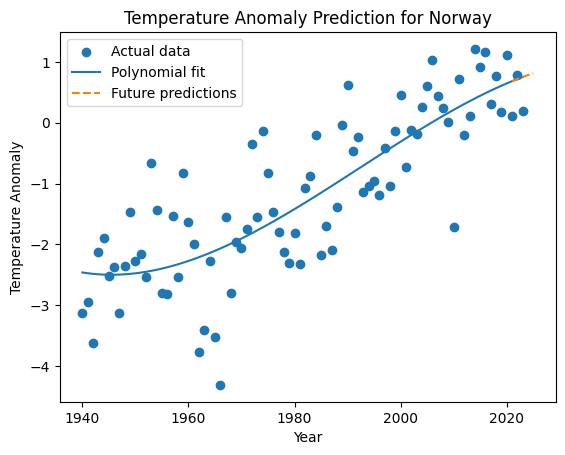

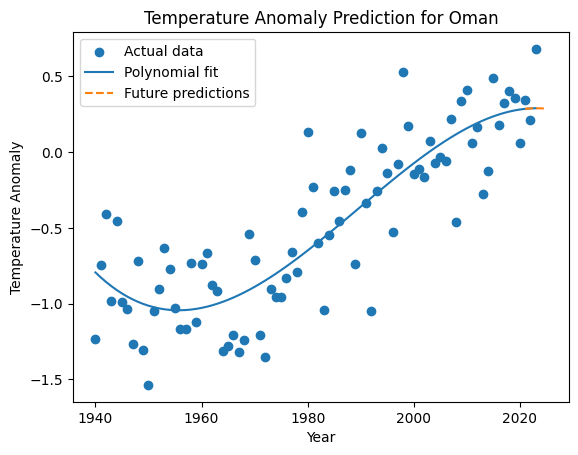

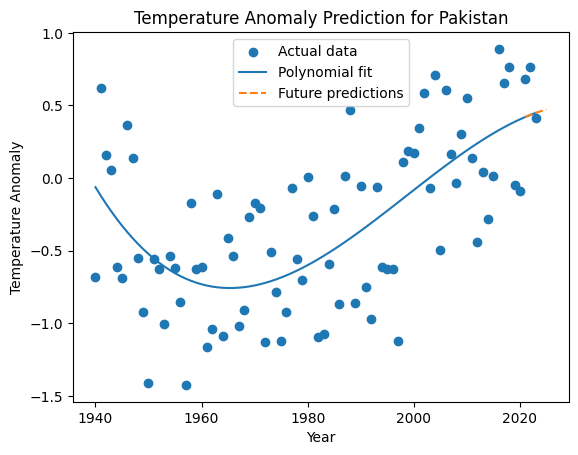

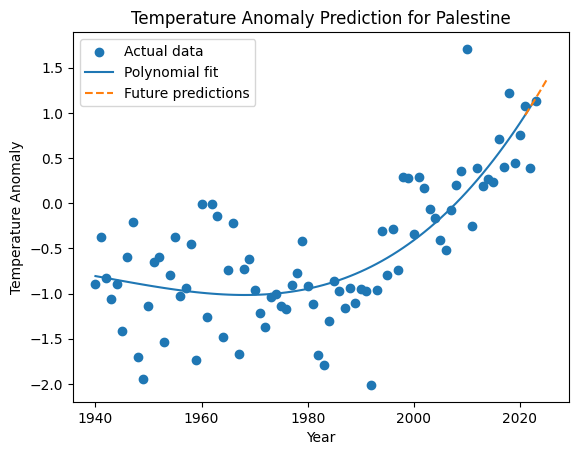

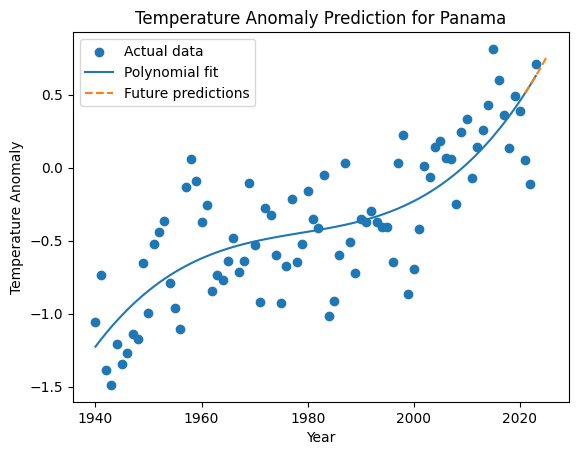

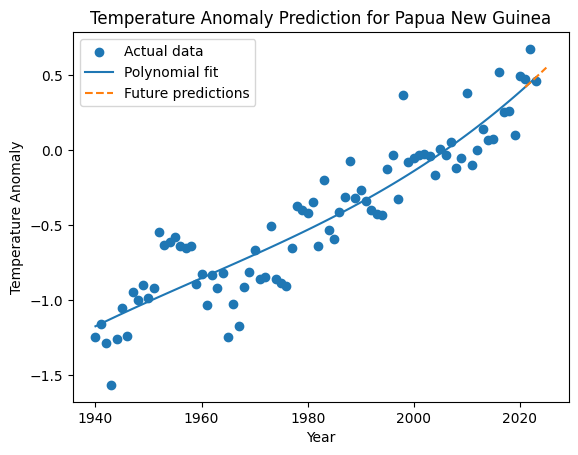

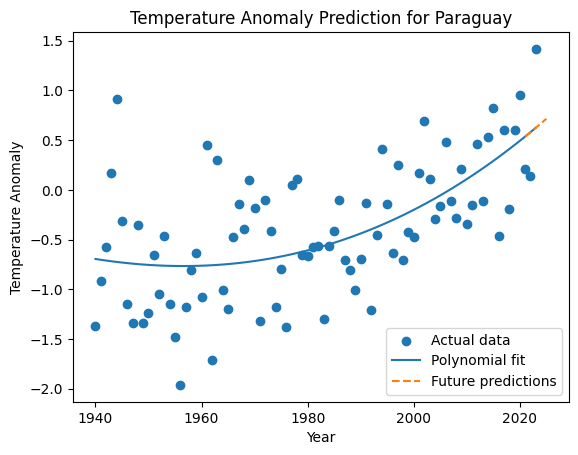

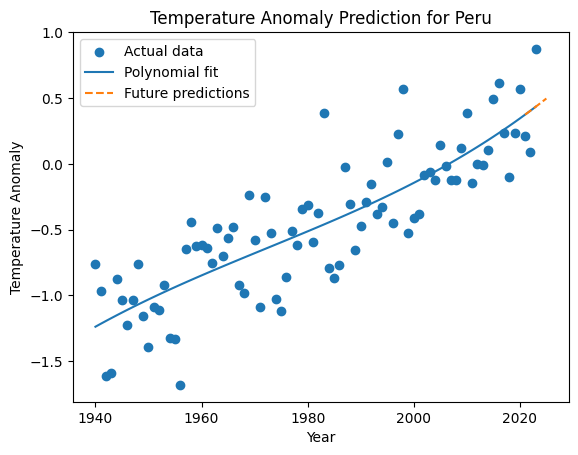

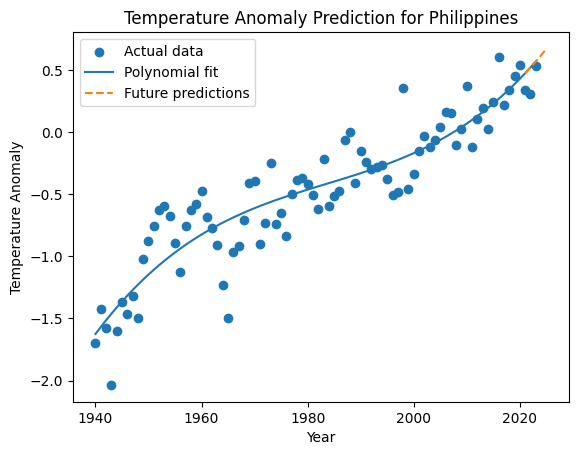

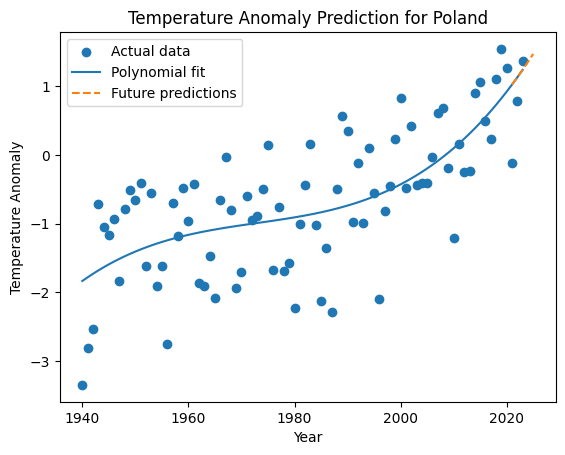

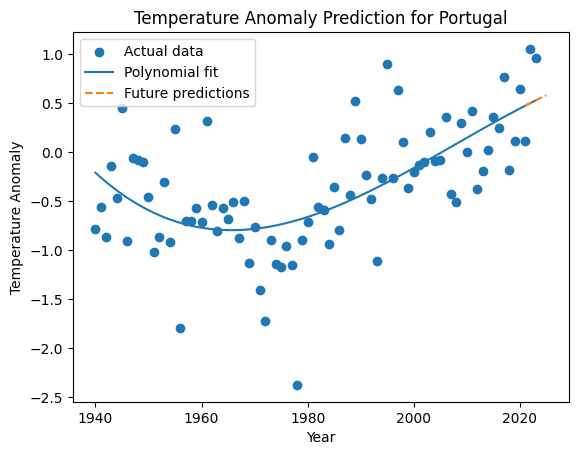

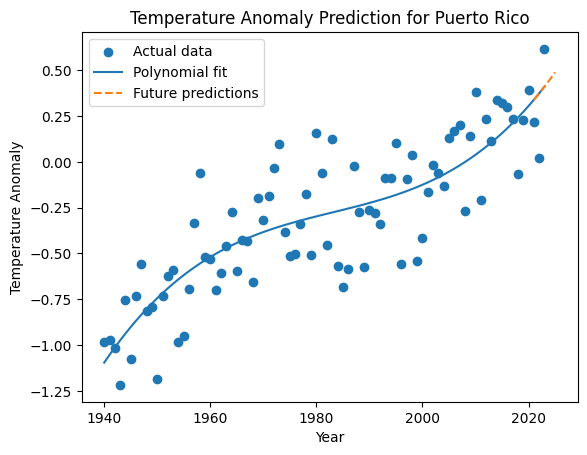

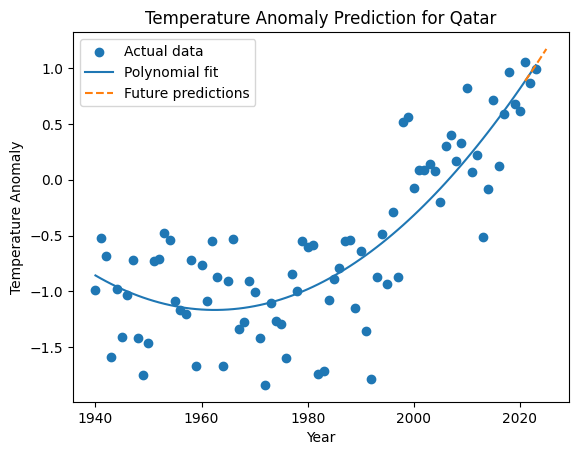

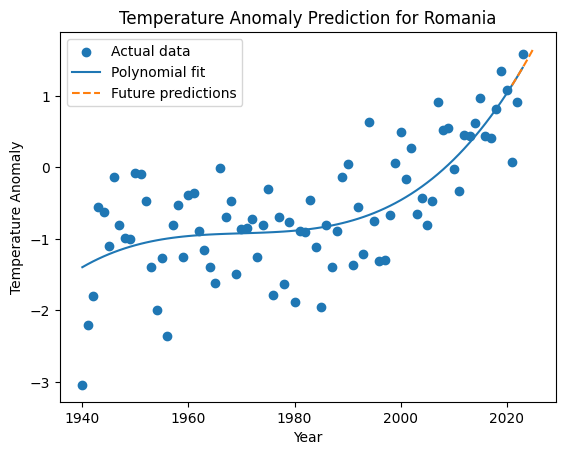

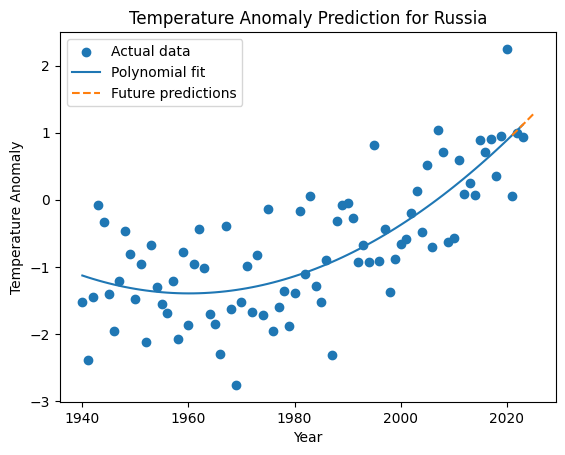

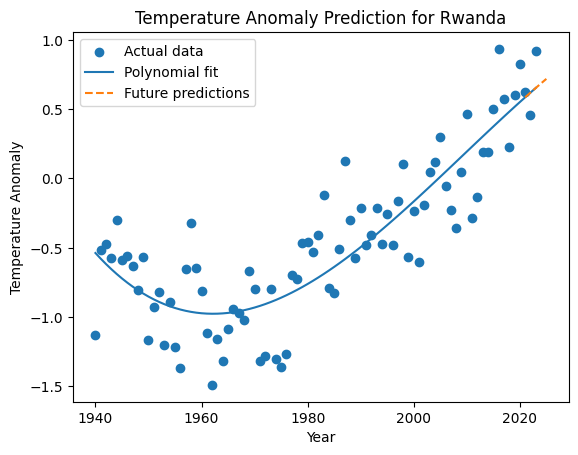

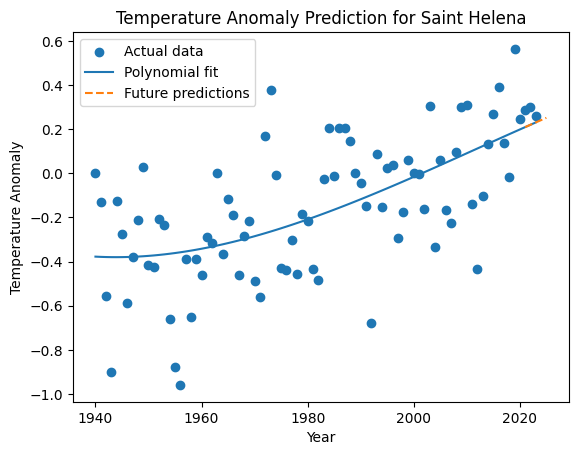

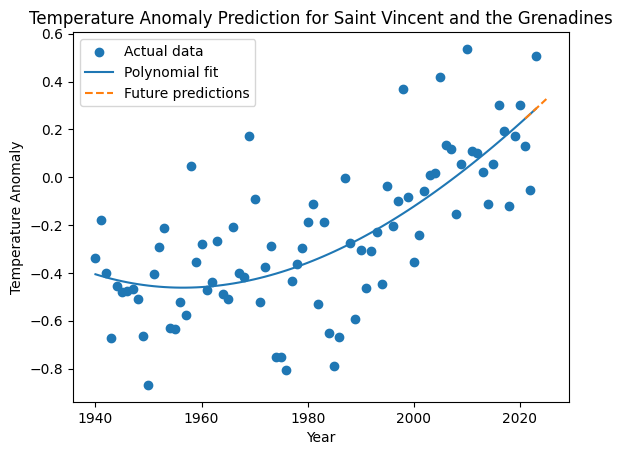

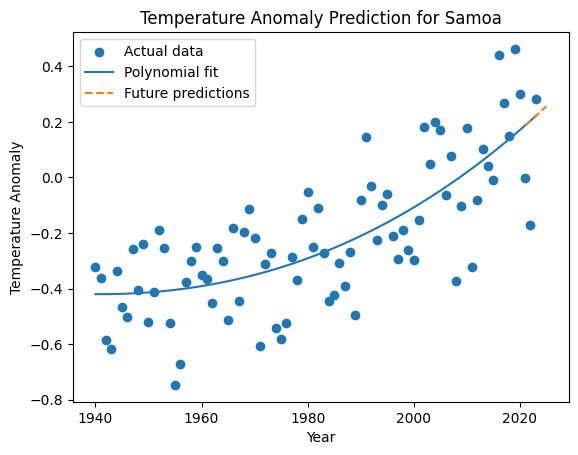

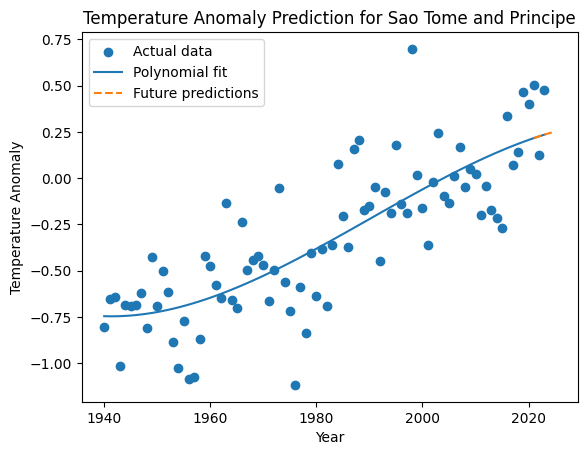

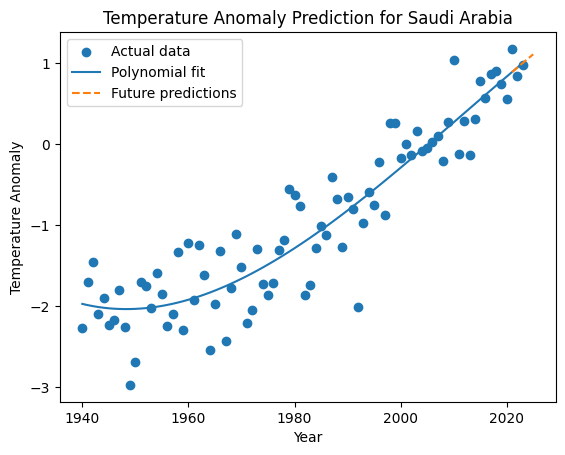

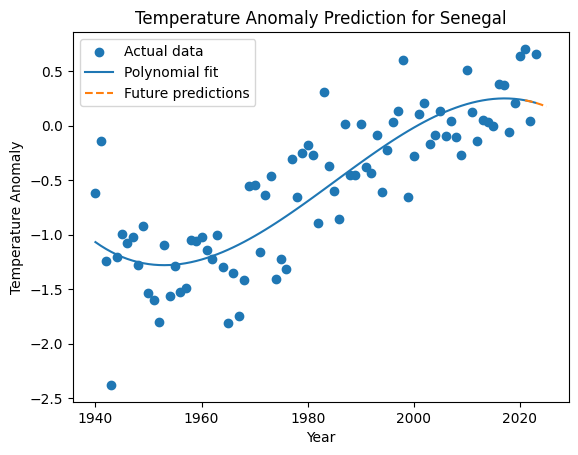

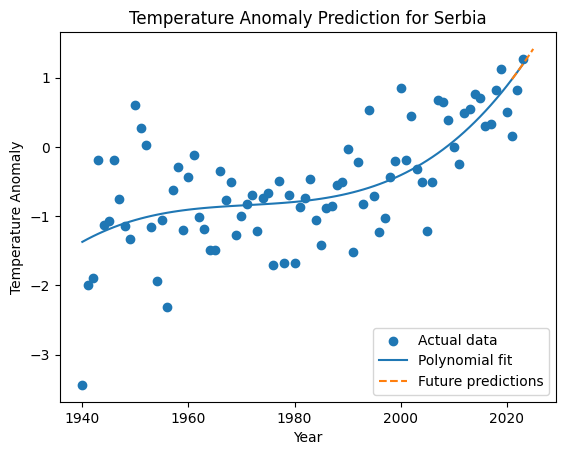

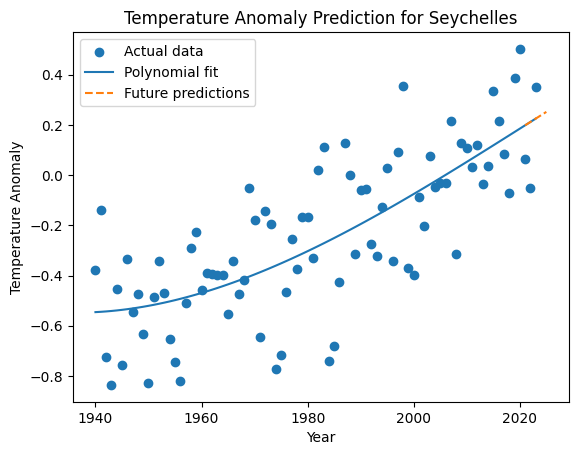

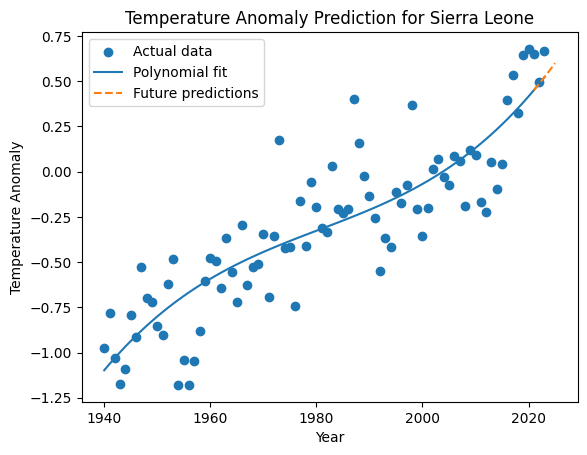

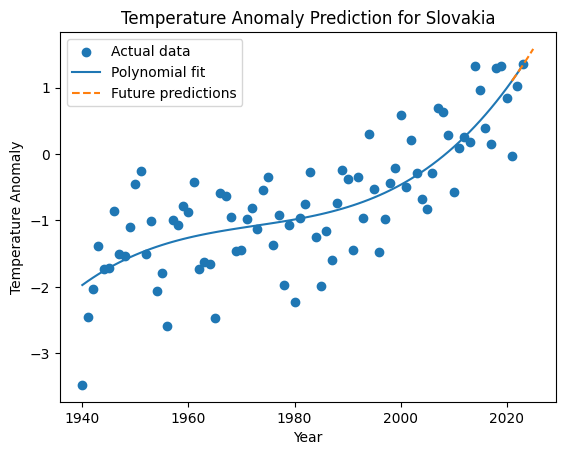

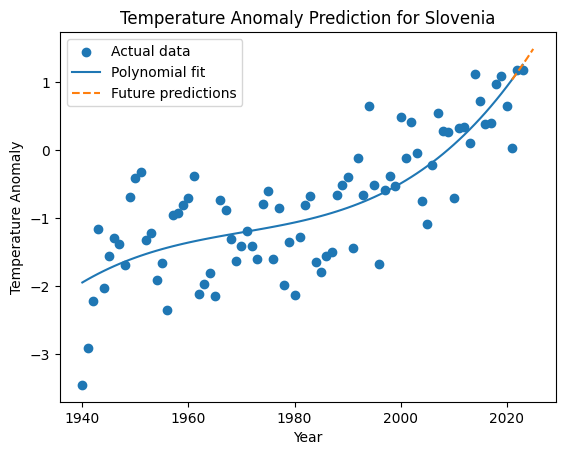

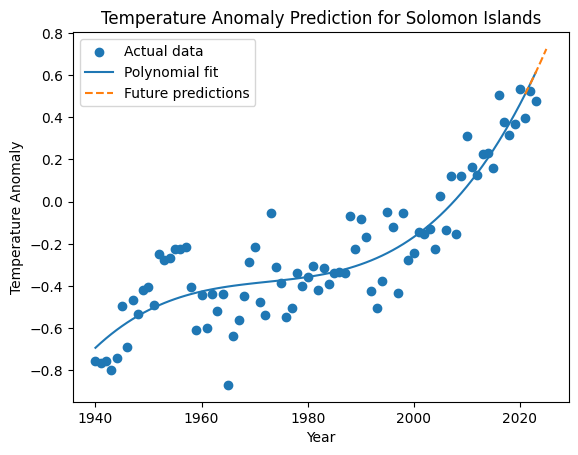

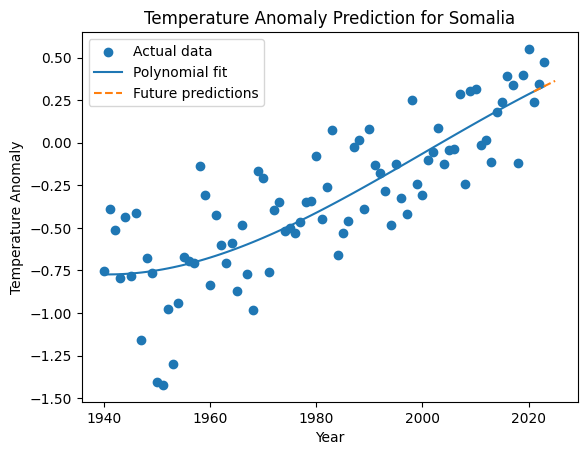

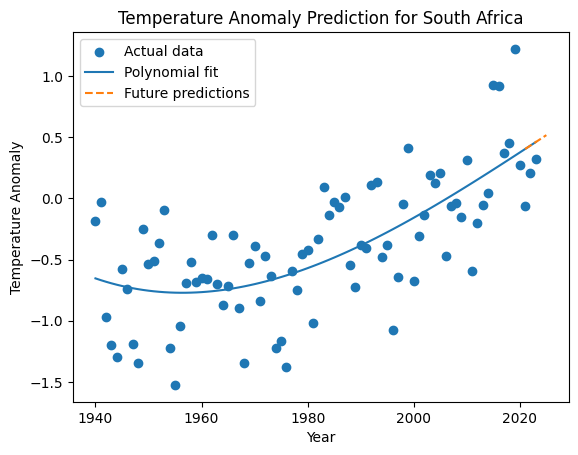

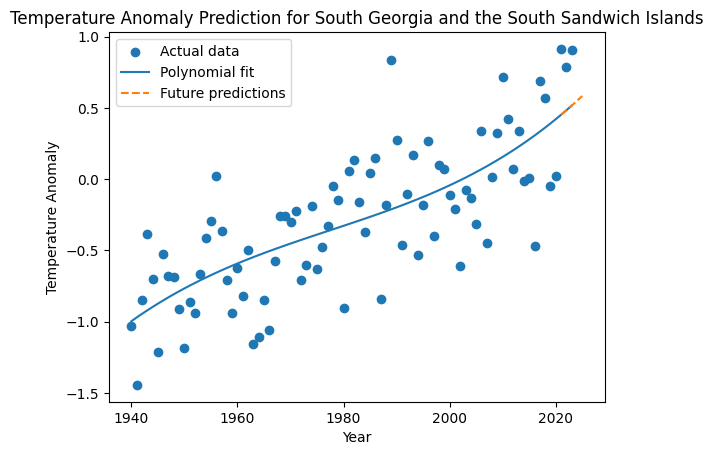

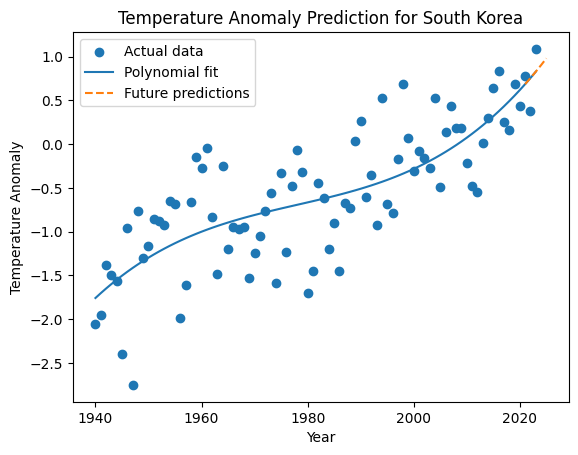

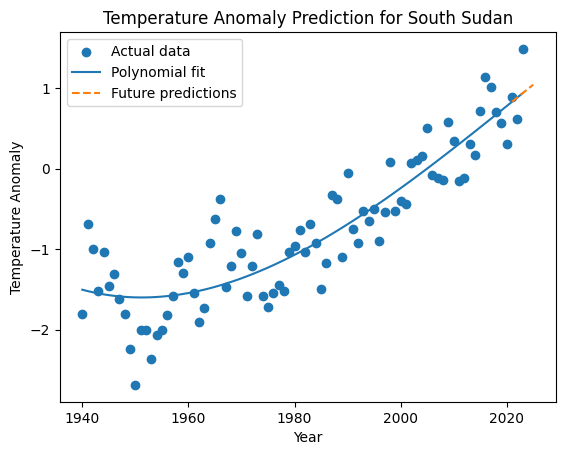

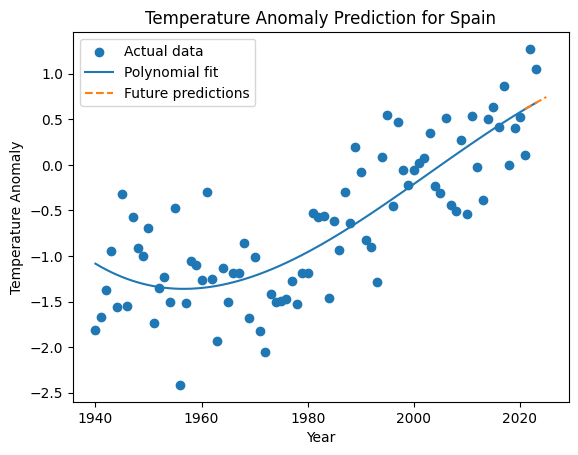

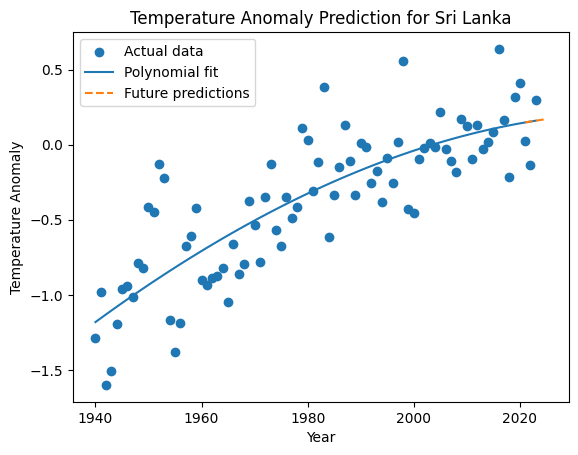

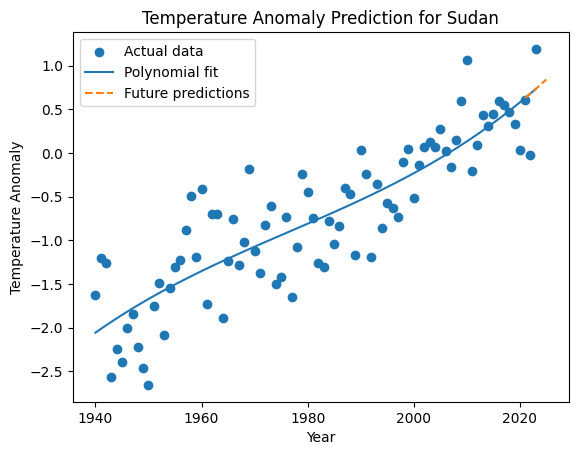

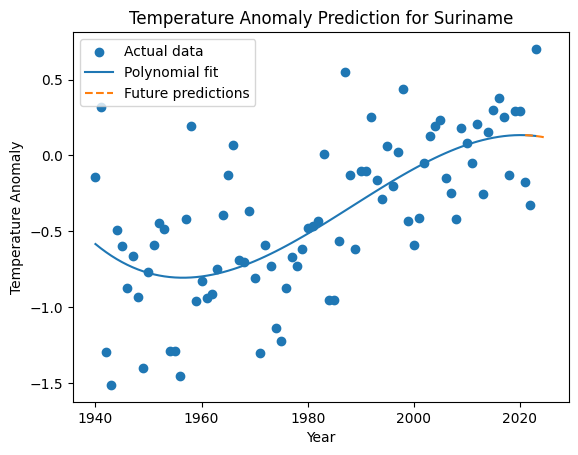

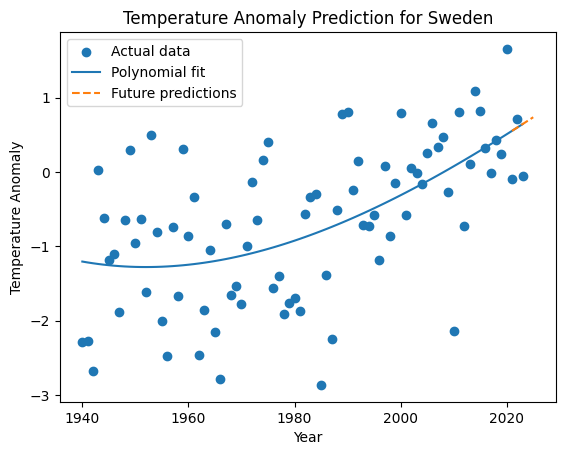

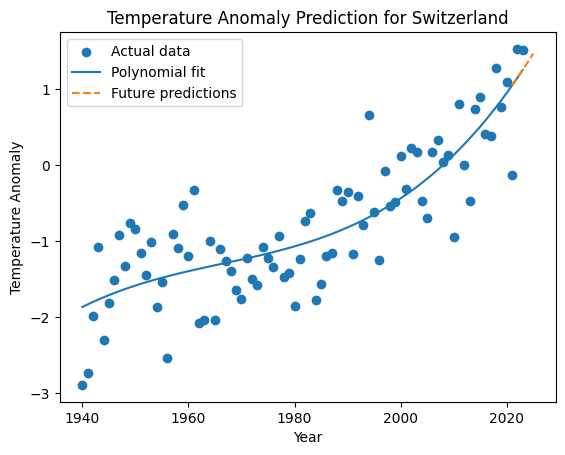

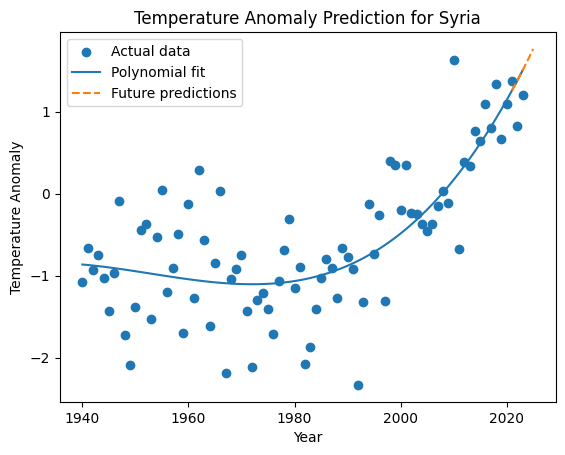

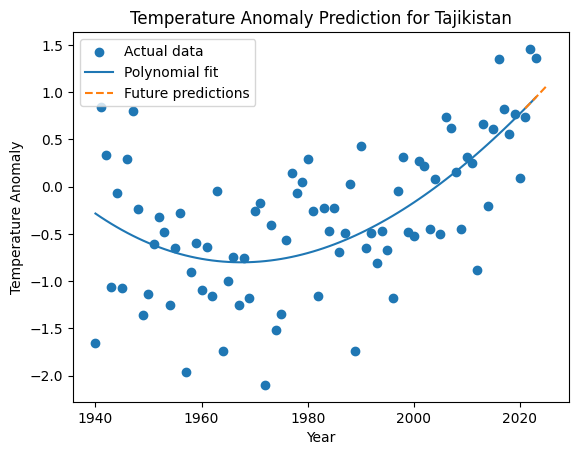

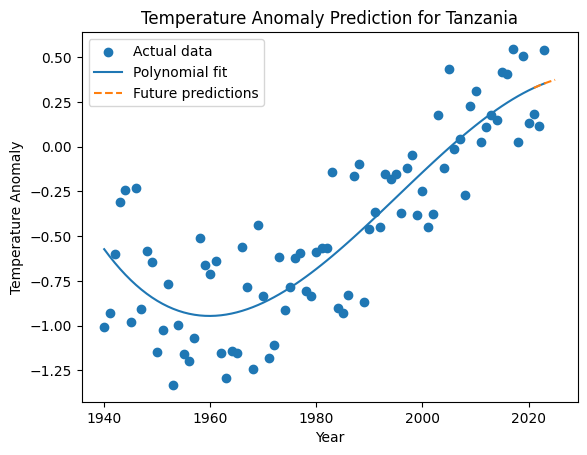

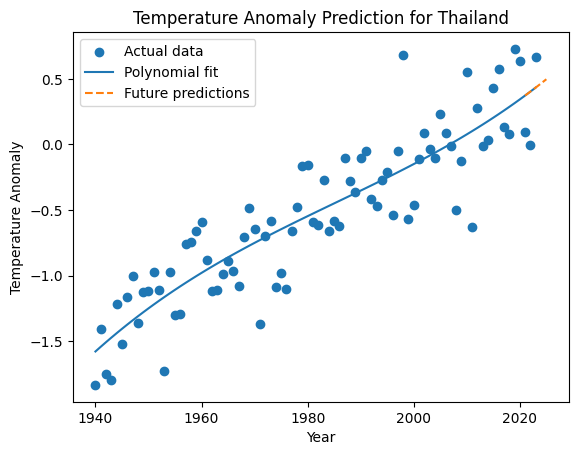

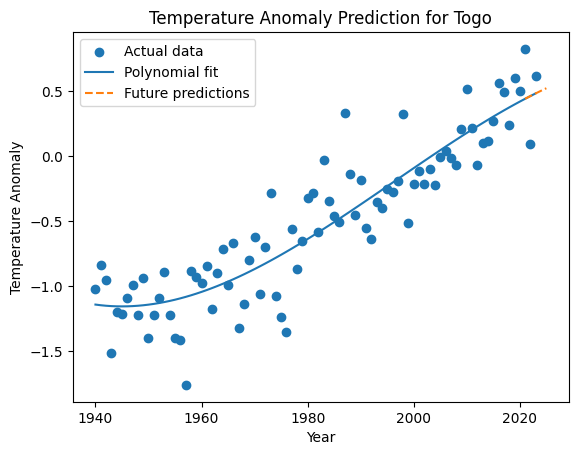

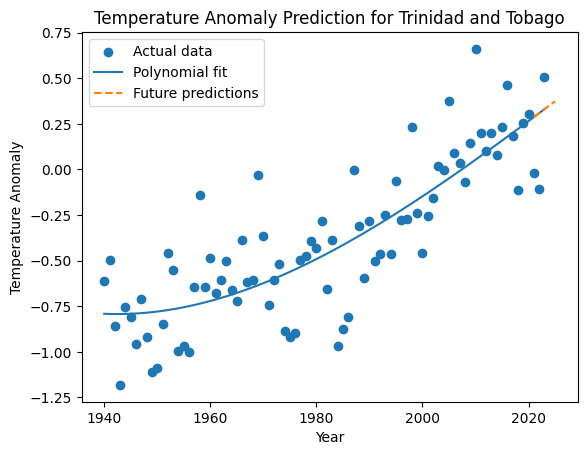

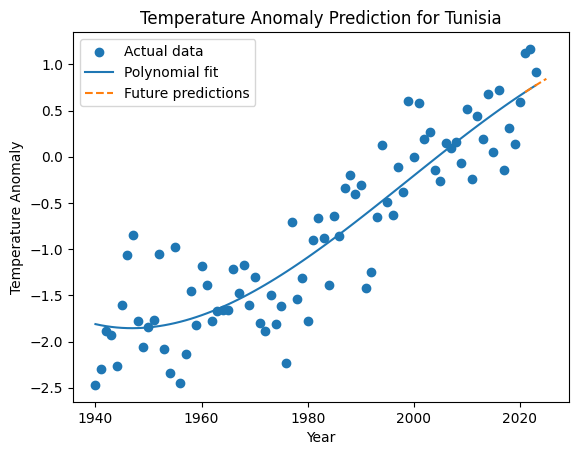

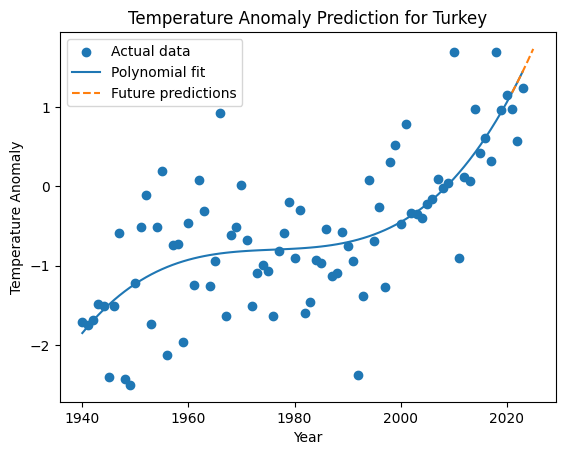

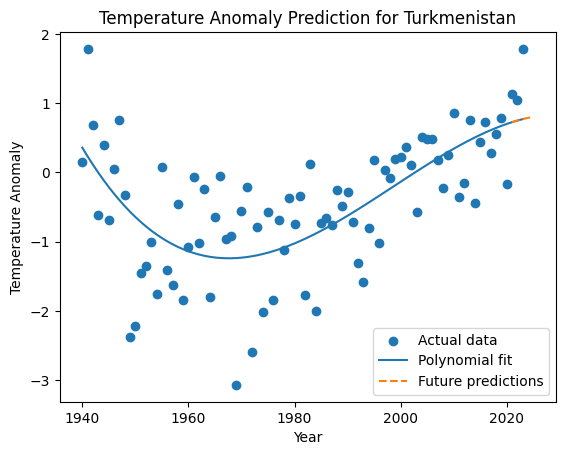

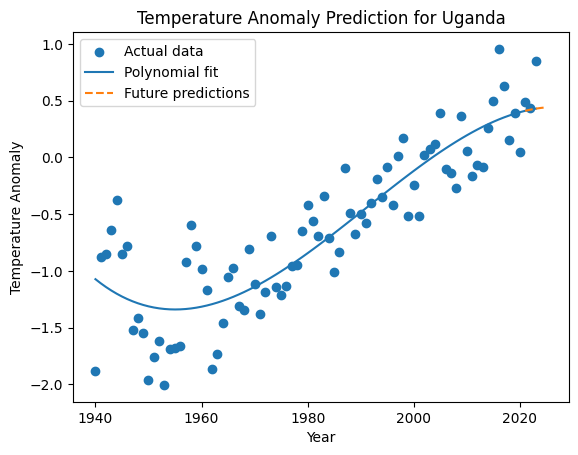

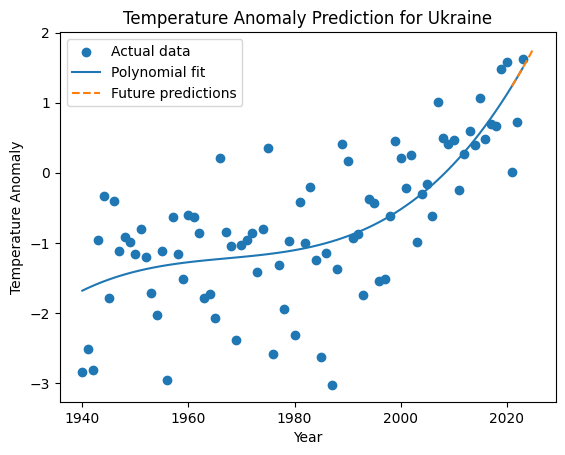

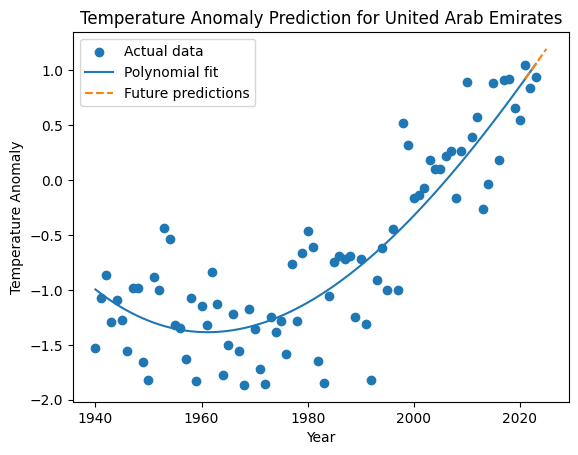

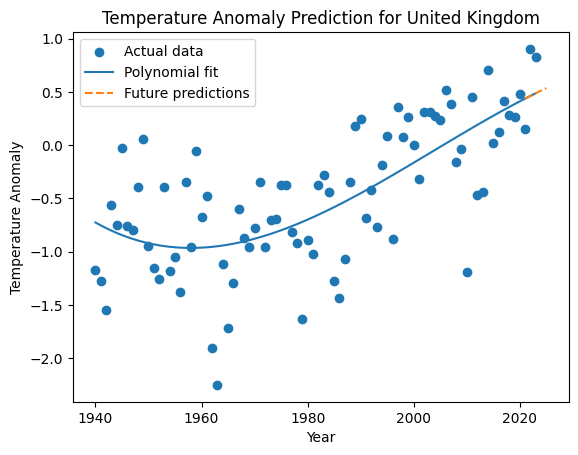

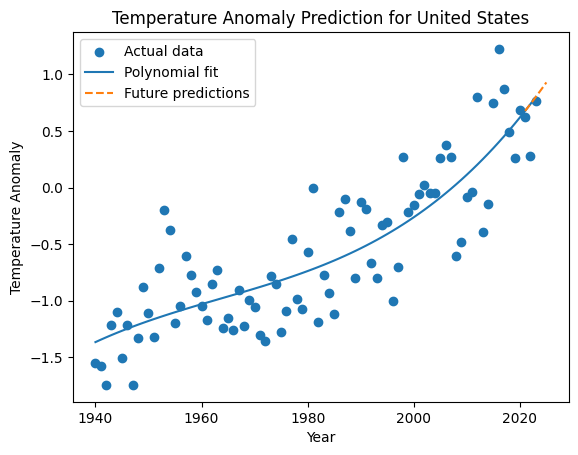

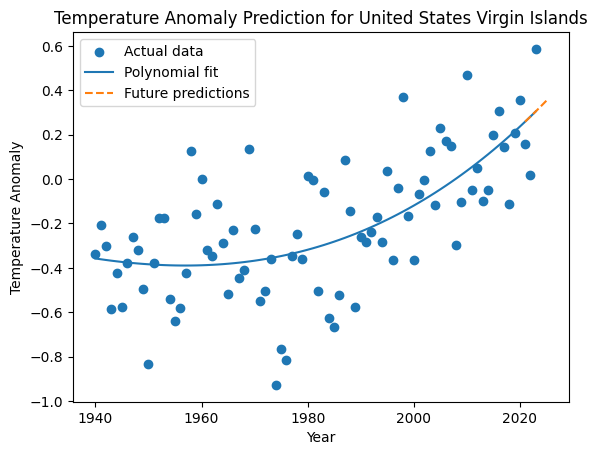

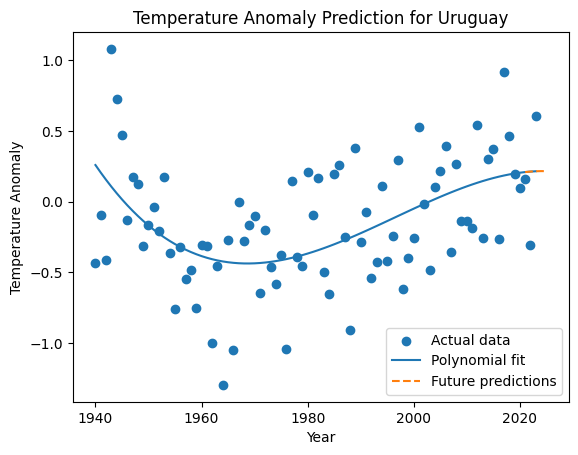

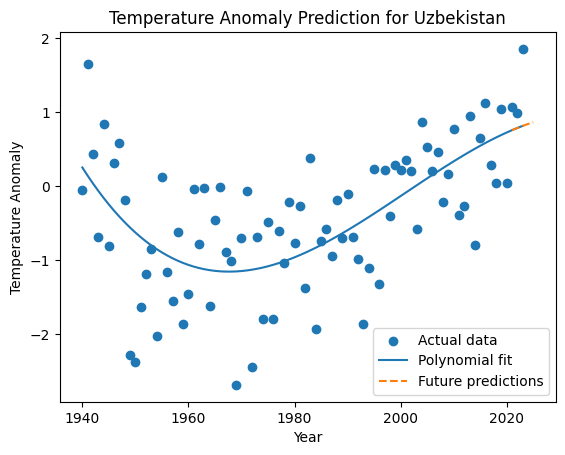

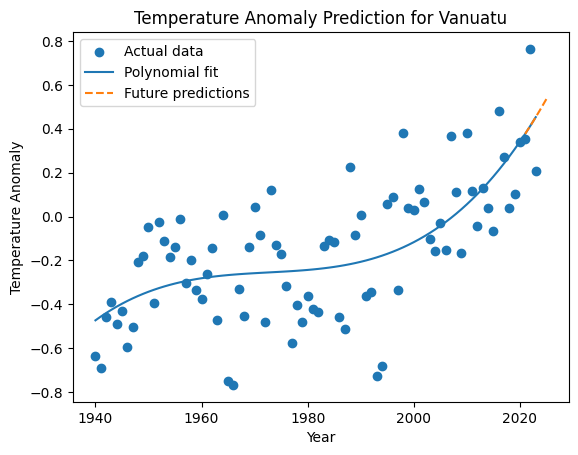

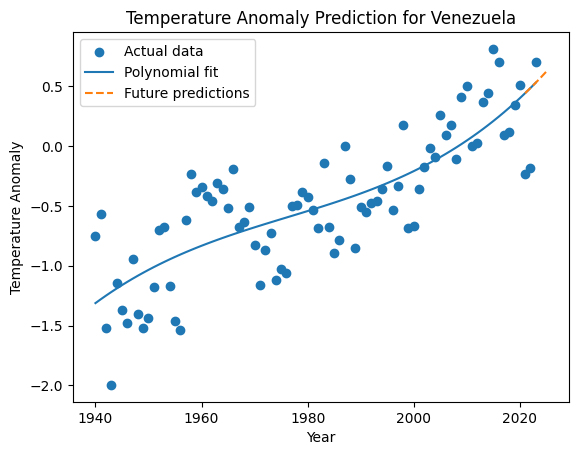

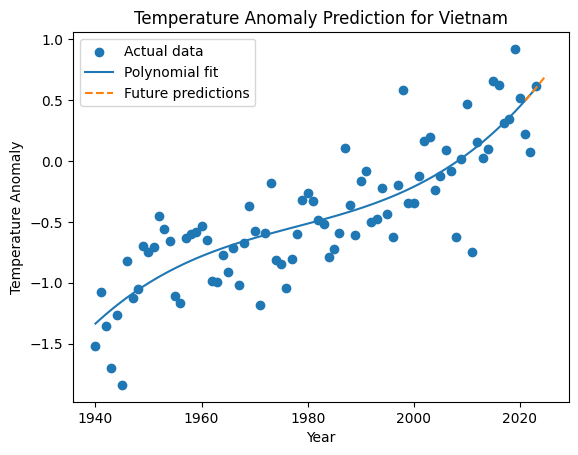

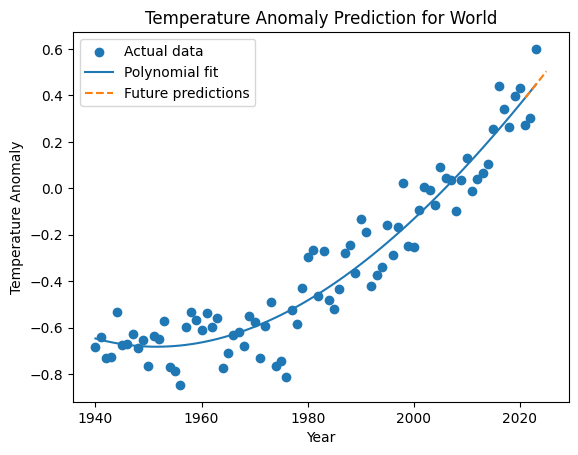

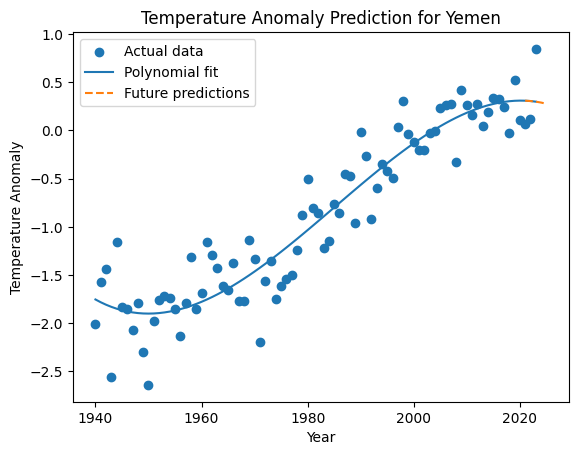

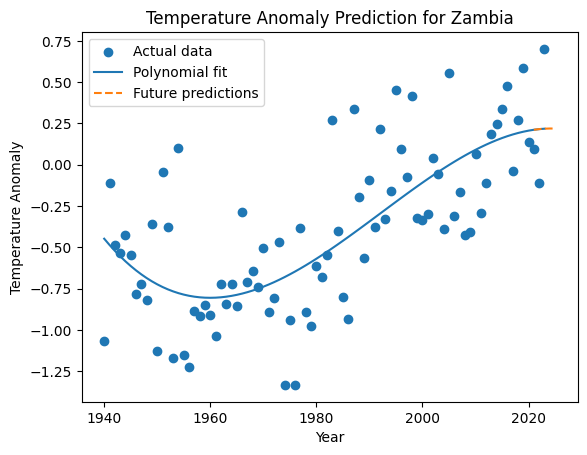

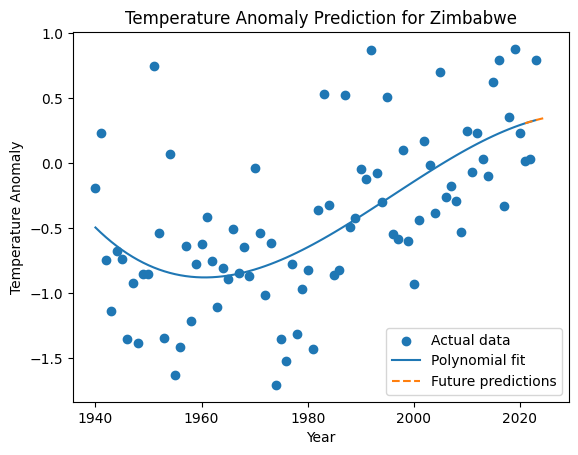

In [2]:
temperature_df = pd.read_csv('../datasets/annual-temperature-anomalies.csv')
year_column = 'Year'
temperature_column = 'Temperature anomaly'

degree = 3
models = {}
predictions = {}

for country in temperature_df['Entity'].unique():
    country_df = temperature_df[temperature_df['Entity'] == country]
    
    X = country_df[year_column].values.reshape(-1, 1)
    y = country_df[temperature_column].values
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    models[country] = model
    
    future_years = np.arange(2021, 2026).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    future_predictions = model.predict(future_years_poly)
    
    predictions[country] = future_predictions

    plt.scatter(X, y, label='Actual data')
    plt.plot(X, model.predict(X_poly), label='Polynomial fit')
    plt.plot(future_years, future_predictions, label='Future predictions', linestyle='--')
    plt.title(f'Temperature Anomaly Prediction for {country}')
    plt.xlabel('Year')
    plt.ylabel('Temperature Anomaly')
    plt.legend()
    plt.show()

degree = 3
future_years = np.arange(2024, 2125)

all_predictions = []

for country in temperature_df['Entity'].unique():
    country_df = temperature_df[temperature_df['Entity'] == country]
    
    X = country_df[year_column].values.reshape(-1, 1)
    y = country_df[temperature_column].values
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict for future years
    future_years_poly = poly.transform(future_years.reshape(-1, 1))
    future_predictions = model.predict(future_years_poly)
    
    # Store predictions with corresponding country and years
    for year, prediction in zip(future_years, future_predictions):
        all_predictions.append([country, year, prediction])

predictions_df = pd.DataFrame(all_predictions, columns=['Entity', 'Year', 'Temperature anomaly'])

csv_file_path = 'temperature_anomaly_predictions_2024_2124.csv'
predictions_df.to_csv(csv_file_path, index=False)